<a href="https://colab.research.google.com/github/NaithaniAR/CapstoneProject-MLClassification/blob/main/Bank_Marketing_Effectiveness_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting the effectiveness of bank marketing campaigns </u></b>

## <b> Problem Description </b>

### The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The classification goal is to predict if the client will subscribe a term deposit (variable y).


## <b> Data Description </b>

## <b>Input variables: </b>
### <b> Bank Client data: </b>

* ### age (numeric)
* ### job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* ### marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* ### education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* ### default: has credit in default? (categorical: 'no','yes','unknown')
* ### housing: has housing loan? (categorical: 'no','yes','unknown')
* ### loan: has personal loan? (categorical: 'no','yes','unknown')

### <b> Related with the last contact of the current campaign:</b>
* ### contact: contact communication type (categorical: 'cellular','telephone')
* ### month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* ### day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
* ### duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### <b>Other attributes: </b>
* ### campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* ### pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* ### previous: number of contacts performed before this campaign and for this client (numeric)
* ### poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


### <b>Output variable (desired target):</b>
* ### y - has the client subscribed a term deposit? (binary: 'yes','no')

Mounting Drive


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#Installing klib librarie 

!pip install klib

 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
#import linear algebra and data manipulation libraries
import numpy as np
import pandas as pd

#import standard visualization
import matplotlib.pyplot as plt
import seaborn as sns
import klib

#import machine learning
from sklearn.linear_model import Ridge,Lasso, LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

import xgboost

from sklearn.model_selection import train_test_split #split
from sklearn.metrics import accuracy_score #metrics

#tools for hyperparameters search
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

import os
#print(os.listdir("../input"))



from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

Importing Datasets 

In [4]:
df=pd.read_csv('/content/drive/MyDrive/Datasets/bank-full.csv',sep=';')

#To suppres scientific notation.
pd.options.display.float_format = '{:.2f}'.format 

pd.set_option('display.max_columns', None)

# Marketing
Marketing is the process of exploring, creating, and delivering value to meet the needs of a target market in terms of goods and services; potentially including selection of a target audience; selection of certain attributes or themes to emphasize in advertising; operation of advertising campaigns; attendance at trade shows and public events; design of products and packaging attractive to buyers; defining the terms of sale, such as price, discounts, warranty, and return policy; product placement in media or with people believed to influence the buying habits of others; agreements with retailers, wholesale distributors, or resellers; and attempts to create awareness of, loyalty to, and positive feelings about a brand

## Data Exploration

In [5]:
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
# Catagorical columns 

categorical_features  = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome']

# Numerical columns

numerical_features  = ['age','balance', 'day','duration', 'campaign', 'pdays', 'previous']


In [8]:
# Pearson correlation coefficient

df.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.00,0.10,-0.01,-0.00,0.00,-0.02,0.00
balance,0.10,1.00,0.00,0.02,-0.01,0.00,0.02
day,-0.01,0.00,1.00,-0.03,0.16,-0.09,-0.05
duration,-0.00,0.02,-0.03,1.00,-0.08,-0.00,0.00
campaign,0.00,-0.01,0.16,-0.08,1.00,-0.09,-0.03
pdays,-0.02,0.00,-0.09,-0.00,-0.09,1.00,0.45
previous,0.00,0.02,-0.05,0.00,-0.03,0.45,1.00


## Checking for null values 

In [9]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [10]:
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

# Exploratory data analysis 


## Data Visualization
Data visualization is the graphical representation of information and data. By using visual elements like charts, graphs, and maps, data visualization tools provide an accessible way to see and understand trends, outliers, and patterns in data.

Categorical columns 


In [11]:
categorical_features  = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome']

<Figure size 1080x360 with 0 Axes>

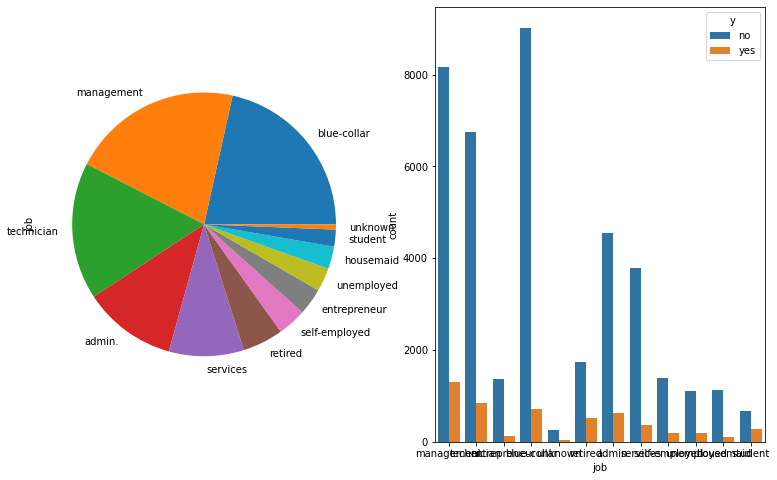

<Figure size 1080x360 with 0 Axes>

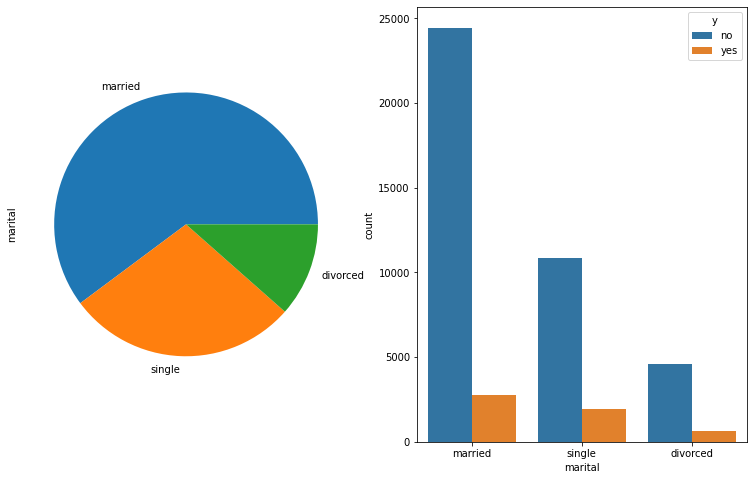

<Figure size 1080x360 with 0 Axes>

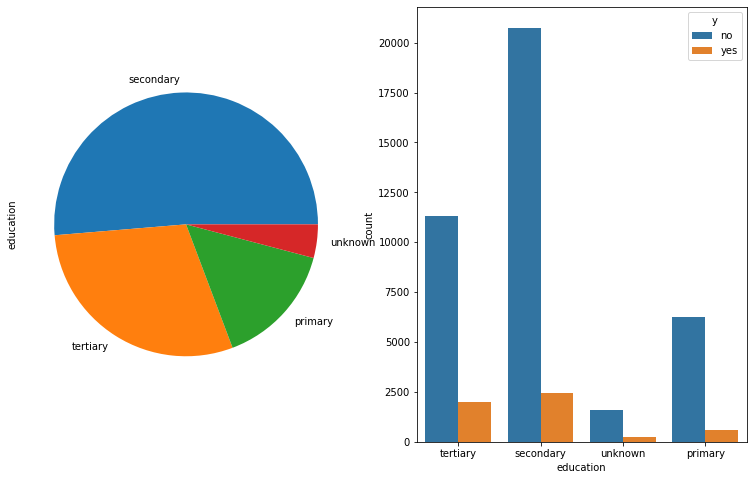

<Figure size 1080x360 with 0 Axes>

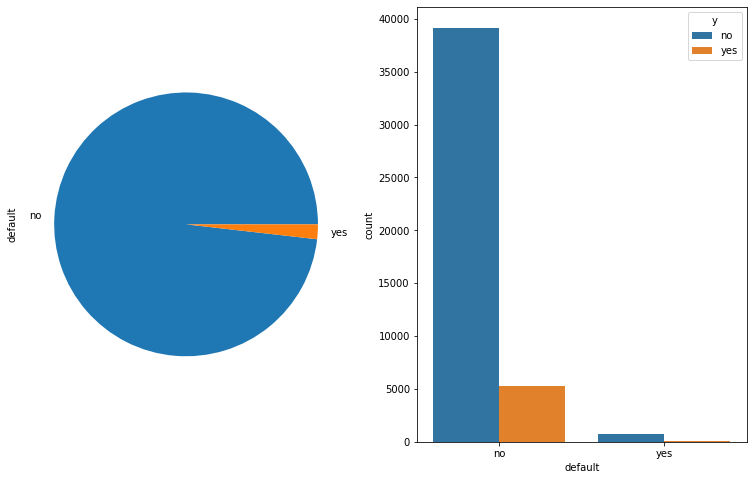

<Figure size 1080x360 with 0 Axes>

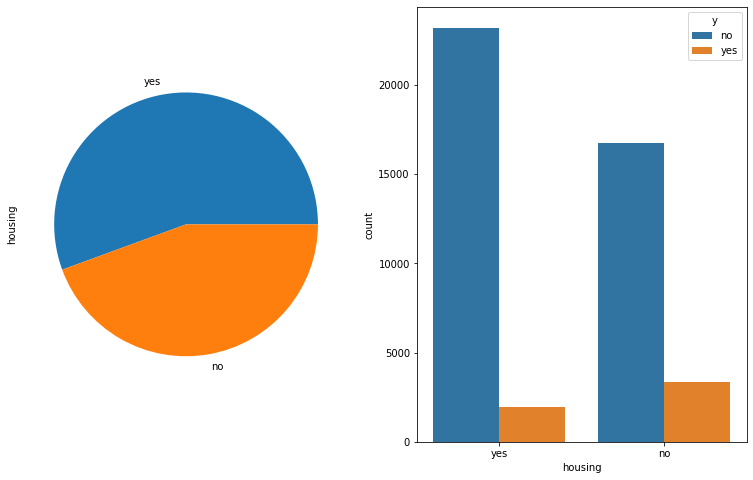

<Figure size 1080x360 with 0 Axes>

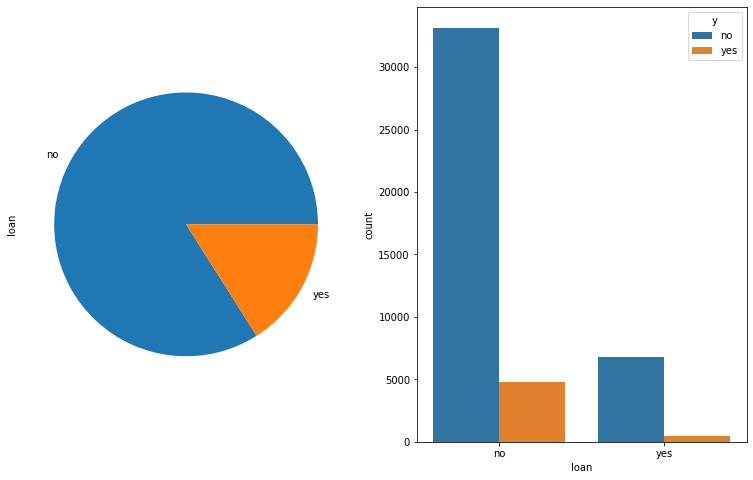

<Figure size 1080x360 with 0 Axes>

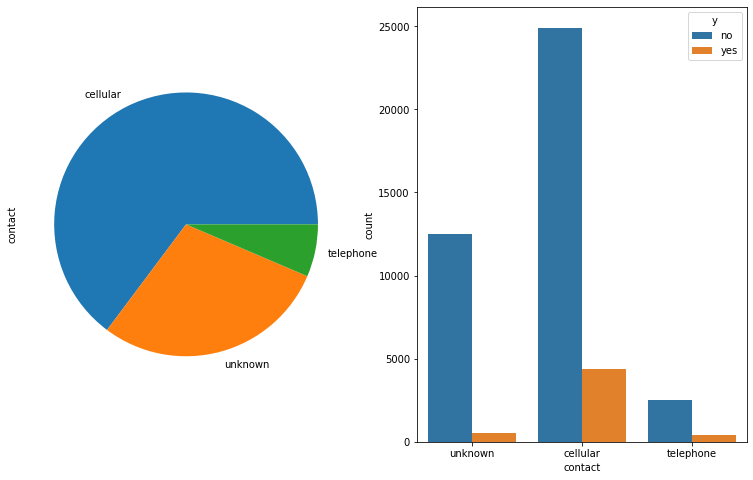

<Figure size 1080x360 with 0 Axes>

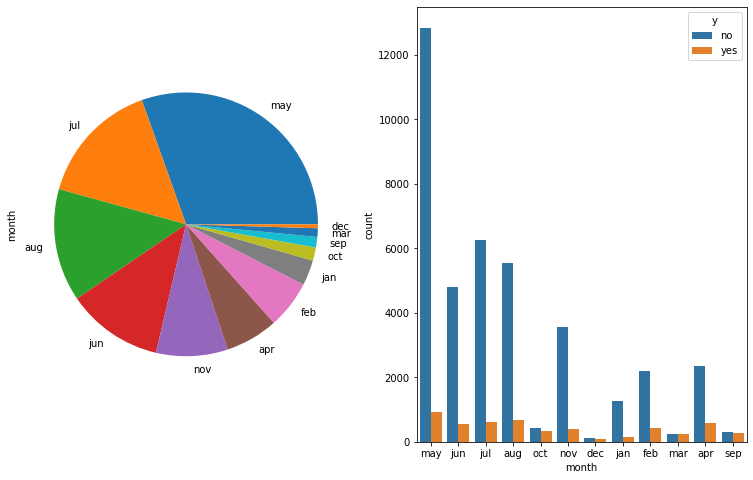

<Figure size 1080x360 with 0 Axes>

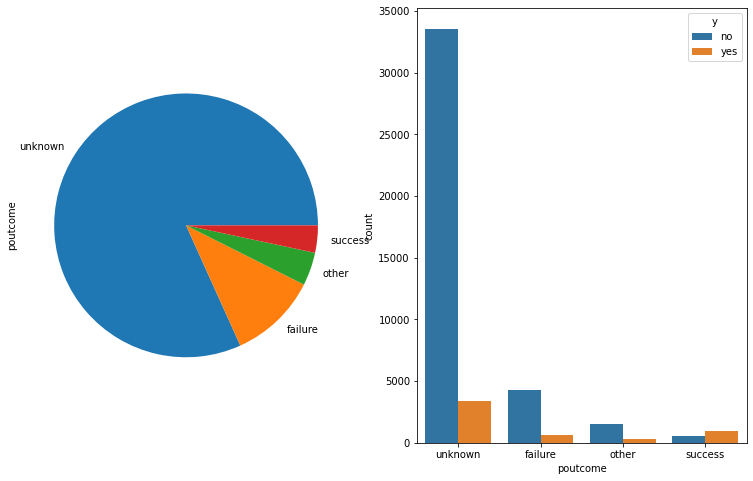

In [12]:
#plot to determine the relationship between categories

for col in categorical_features:
  plt.figure(figsize=(15,5))
  fig, axes = plt.subplots(ncols=2,figsize=(13,8))
  df[col].value_counts().plot(kind="pie",ax = axes[0],subplots=True)
  sns.countplot(x = col, hue = 'y', data = df)

Numerical columns 


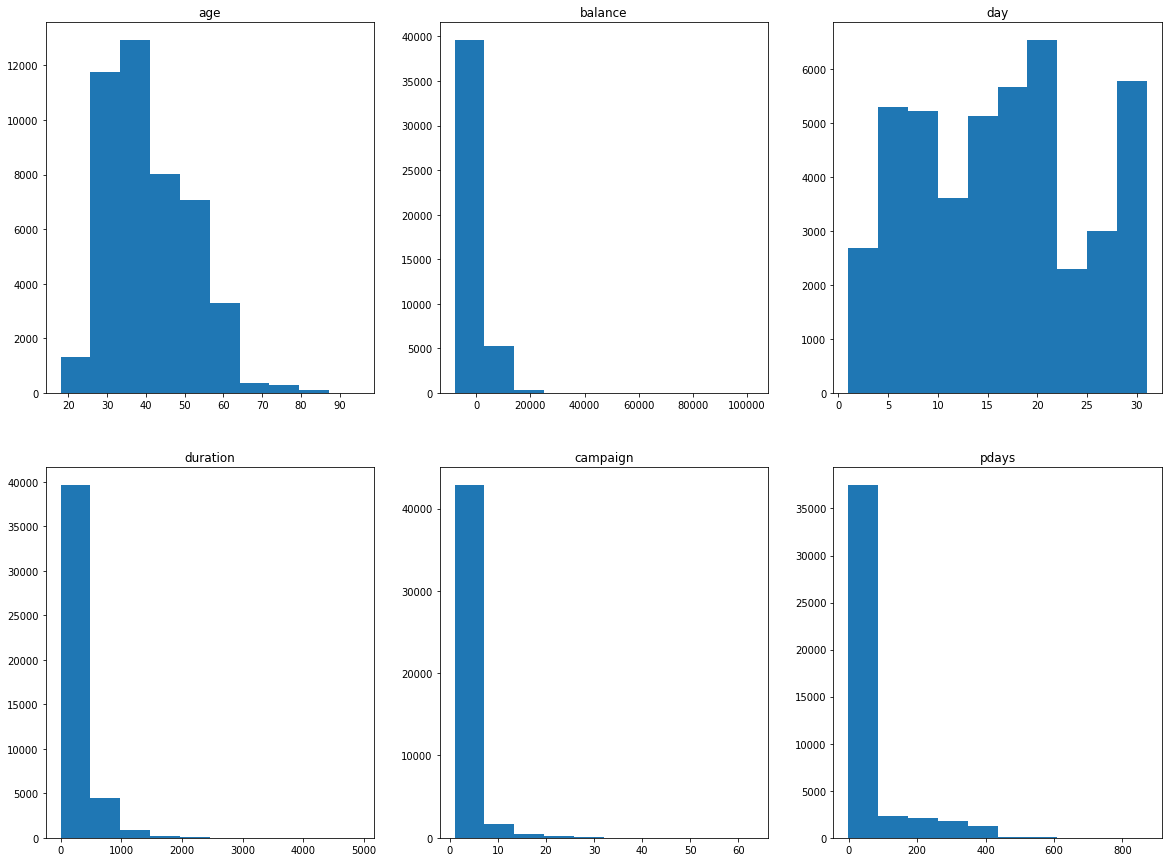

In [13]:
#Numerical columns Visualization

fig, axs = plt.subplots(2, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for numerical_feature in numerical_features:
    
    trace_x = counter // 3
    trace_y = counter % 3
    try:
     axs[trace_x, trace_y].hist(df[numerical_feature])
    
     axs[trace_x, trace_y].set_title(numerical_feature)
    except Exception:
     pass   
    
    counter += 1

plt.show()

# Numerical columns

num_columns = ['age','balance', 'day','duration', 'campaign', 'pdays', 'previous']

We can see that numerical columns have outliers (especially 'pdays', 'campaign' and 'previous' columns).We should have a look closer at the data.



In [14]:
df[num_columns].describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00
mean,40.94,1362.27,15.81,258.16,2.76,40.20,0.58
std,10.62,3044.77,8.32,257.53,3.10,100.13,2.30
min,18.00,-8019.00,1.00,0.00,1.00,-1.00,0.00
25%,33.00,72.00,8.00,103.00,1.00,-1.00,0.00
50%,39.00,448.00,16.00,180.00,2.00,-1.00,0.00
75%,48.00,1428.00,21.00,319.00,3.00,-1.00,0.00
max,95.00,102127.00,31.00,4918.00,63.00,871.00,275.00


 pdays shows number of days that has passed  after the client was last contacted from a previous campaign. in this variable values range from -1 to 871. Assuming -1 means that the customer was contacted and no days has lapsed since last contact.Since the entry in data has info of existing clients it makes sense that the client was definitely contacted atleast once, will further verify this theory 

In [15]:
df.loc[(df['pdays']==-1) & (df['y']=='yes')].describe()

,age,balance,day,duration,campaign,pdays,previous
count,3384.00,3384.00,3384.00,3384.00,3384.00,3384.00,3384.00
mean,41.22,1701.31,15.40,610.50,2.34,-1.00,0.00
std,13.24,3115.38,8.53,423.18,2.21,0.00,0.00
min,18.00,-3058.00,1.00,8.00,1.00,-1.00,0.00
25%,31.00,172.75,8.00,276.00,1.00,-1.00,0.00
50%,38.00,674.00,15.00,529.00,2.00,-1.00,0.00
75%,50.00,2016.50,21.00,835.00,3.00,-1.00,0.00
max,95.00,52587.00,31.00,3881.00,32.00,-1.00,0.00


In [16]:
df.loc[(df['pdays']==-1) & (df['y']=='no')].describe()

,age,balance,day,duration,campaign,pdays,previous
count,33570.00,33570.00,33570.00,33570.00,33570.00,33570.00,33570.00
mean,40.90,1280.23,16.22,222.17,2.98,-1.00,0.00
std,10.10,3029.18,8.35,209.42,3.41,0.00,0.00
min,18.00,-8019.00,1.00,0.00,1.00,-1.00,0.00
25%,33.00,48.00,9.00,95.00,1.00,-1.00,0.00
50%,39.00,393.00,17.00,164.00,2.00,-1.00,0.00
75%,48.00,1306.00,22.00,281.00,3.00,-1.00,0.00
max,95.00,102127.00,31.00,4918.00,63.00,-1.00,0.00


Since accounts exist  which subscribed and have pdays as -1,all the observatios with pday -1 has zero previous which tilts slightly in our assumption.

Campaign

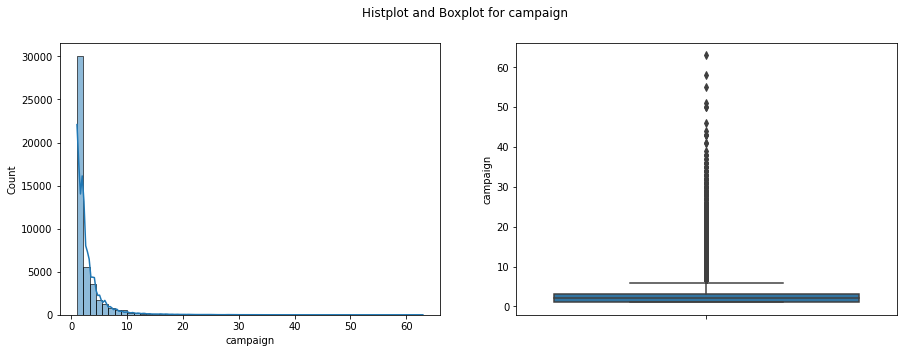

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Histplot and Boxplot for campaign')
# HIstplot
sns.histplot(ax=axes[0], data=df, x="campaign", bins=55,kde=True)
# BoxPlot
sns.boxplot(ax=axes[1],data=df, y="campaign")

Education 

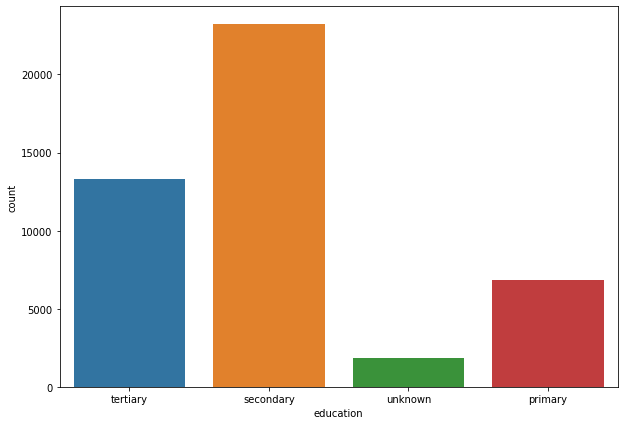

In [18]:
plt.figure(figsize=(10, 7))
sns.countplot(data=df, x="education")


Duration 


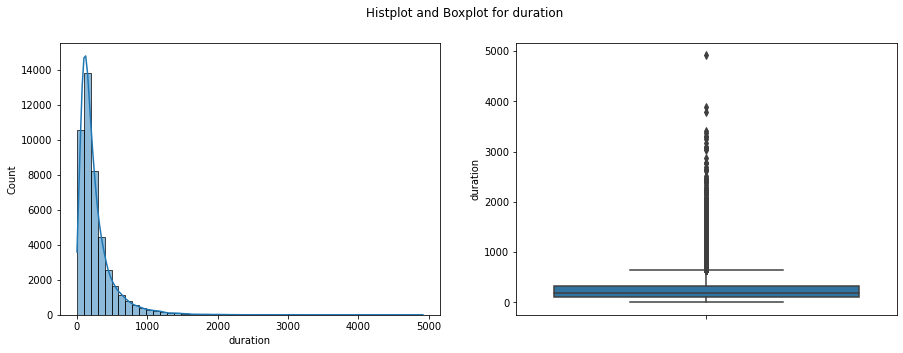

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Histplot and Boxplot for duration')
# Histplot
sns.histplot(ax=axes[0], data=df, x="duration", bins=50,kde=True)
# BoxPlot
sns.boxplot(ax=axes[1],data=df, y="duration")


Balance

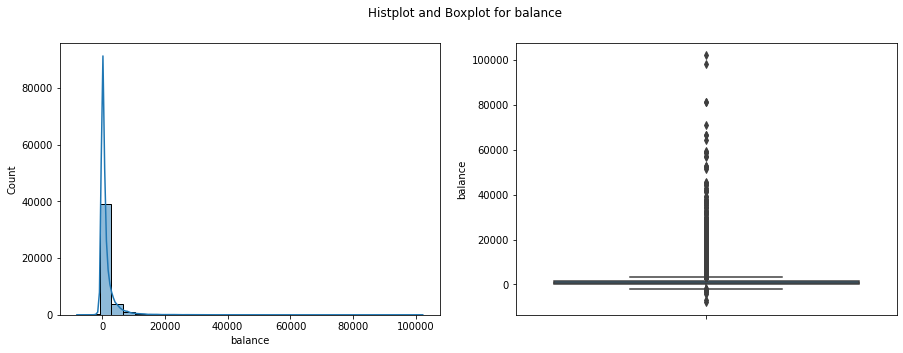

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Histplot and Boxplot for balance')
# HIstplot
sns.histplot(ax=axes[0], data=df, x="balance", bins=30,kde=True)
# BoxPlot
sns.boxplot(ax=axes[1],data=df, y="balance")

Marital

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64


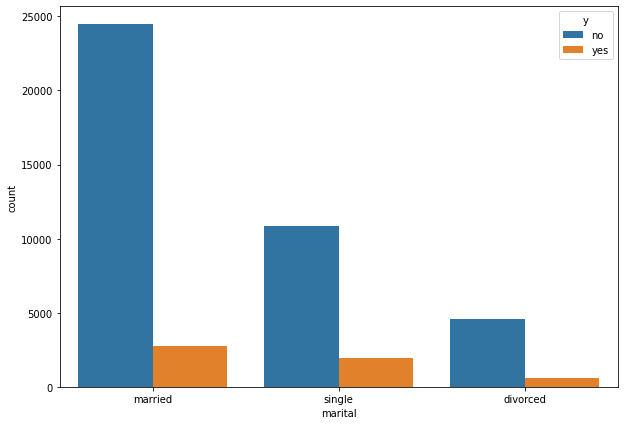

In [21]:
print(df.marital.value_counts())
plt.figure(figsize=(10, 7))
sns.countplot(data=df, x="marital",hue = 'y')

Job


In [22]:
df['y']=df['y'].apply(lambda x : 1 if x == 'yes' else 0)

In [23]:
df.groupby("job").agg({"y" : "sum"})

,y
job,
admin.,631
blue-collar,708
entrepreneur,123
housemaid,109
management,1301
retired,516
self-employed,187
services,369
student,269


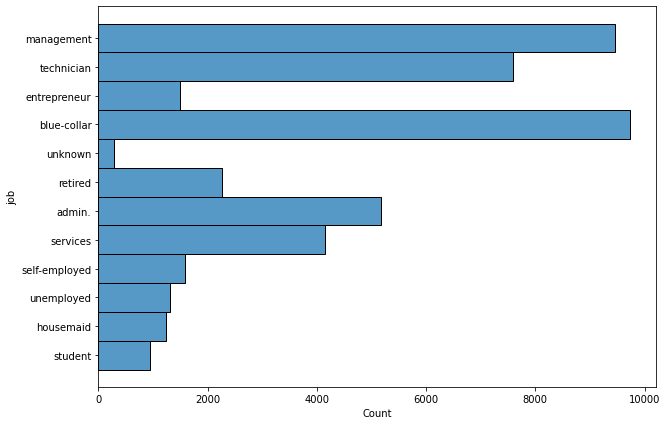

In [24]:
plt.figure(figsize=(10, 7))
sns.histplot(data=df, y="job", palette="pastel")

 Age


In [25]:
#Dividing the age into various columns 
def age_bracket(x):
    if x in range(18,26):
        return 'GenZ'
    elif x in range(26,42):
        return 'Millennials'
    elif x in range(42,58):
        return 'Gen X'
    elif x in range(58,68):
        return 'Boomers II' 
    elif x in range(68,77):
        return 'Boomers I'      
    elif x in range(77,94):
        return 'Post War'       
    elif x in range(94,100):
        return 'WWII'

In [26]:
#Now let us apply this function and create new columns in the dataset.
df['Age_range'] = df['age'].apply(age_bracket)


In [27]:
df.y.value_counts()

0    39922
1     5289
Name: y, dtype: int64

The age ranges from 18 years old to 95 years old. Groupping the age by [Beresford Research](https://www.beresfordresearch.com/age-range-by-generation/)'s Age Range by Generation table 

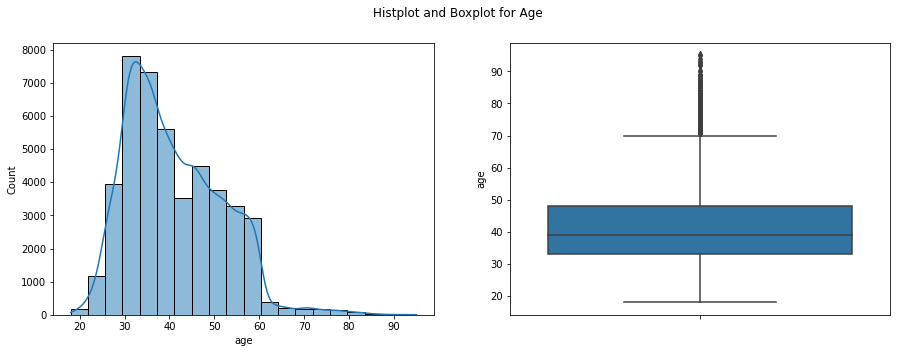

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Histplot and Boxplot for Age')
# HIstplot
sns.histplot(ax=axes[0], data=df, x="age", bins=20,kde=True)
# BoxPlot
sns.boxplot(ax=axes[1],data=df, y="age")

## Bivariate Analysis

Q. Visualise the effect of duration and campaign on the success of the marketing. 

Text(0.5, 0.98, 'Success of Current Subscription')

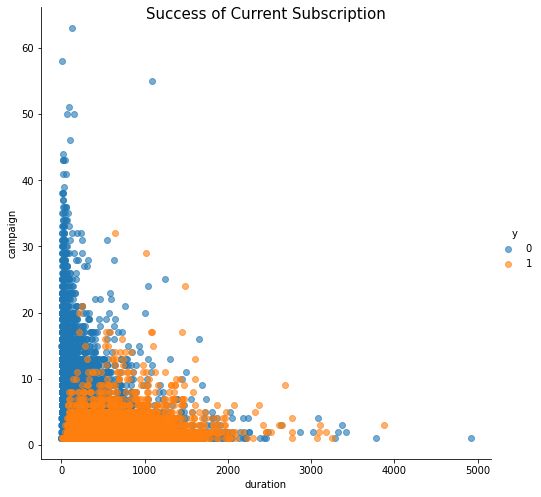

In [29]:
# Corelation Between Duration & Success of Subscription (Current Campaign & Previous Campaign)

q=sns.lmplot(x='duration', y='campaign',data = df,
                     hue = 'y',
                     fit_reg = False,
                     scatter_kws={'alpha':0.6}, height =7)
q.fig.suptitle("Success of Current Subscription",
                  fontsize=15, fontdict={"weight": "bold"})

As we can see from the plot, “yes” clients and “no” clients are forming two relatively separate clusters. Compared to “no” clients”, “yes” clients were contacted by fewer times and had longer call duration. More importantly, after ten campaign calls, clients are more likely to reject the term deposit unless the duration is high. Most “yes” clients were approached by less than 10 times.

This suggests that the bank should device a stratagy to incentivise the clients to stay on call, try and avoid calling the client multiple times and try to close the cliet in the fixed deposite as soon as possible. 


Q. 
Finding Relation Based on balance of Customer and Subscription of Term Deposit

In [30]:
df.balance.value_counts(bins=6)

(-8129.147, 10338.667]    44442
(10338.667, 28696.333]      705
(28696.333, 47054.0]         46
(47054.0, 65411.667]         11
(65411.667, 83769.333]        5
(83769.333, 102127.0]         2
Name: balance, dtype: int64

Text(0.5, 0, 'Balance greater than 83769')

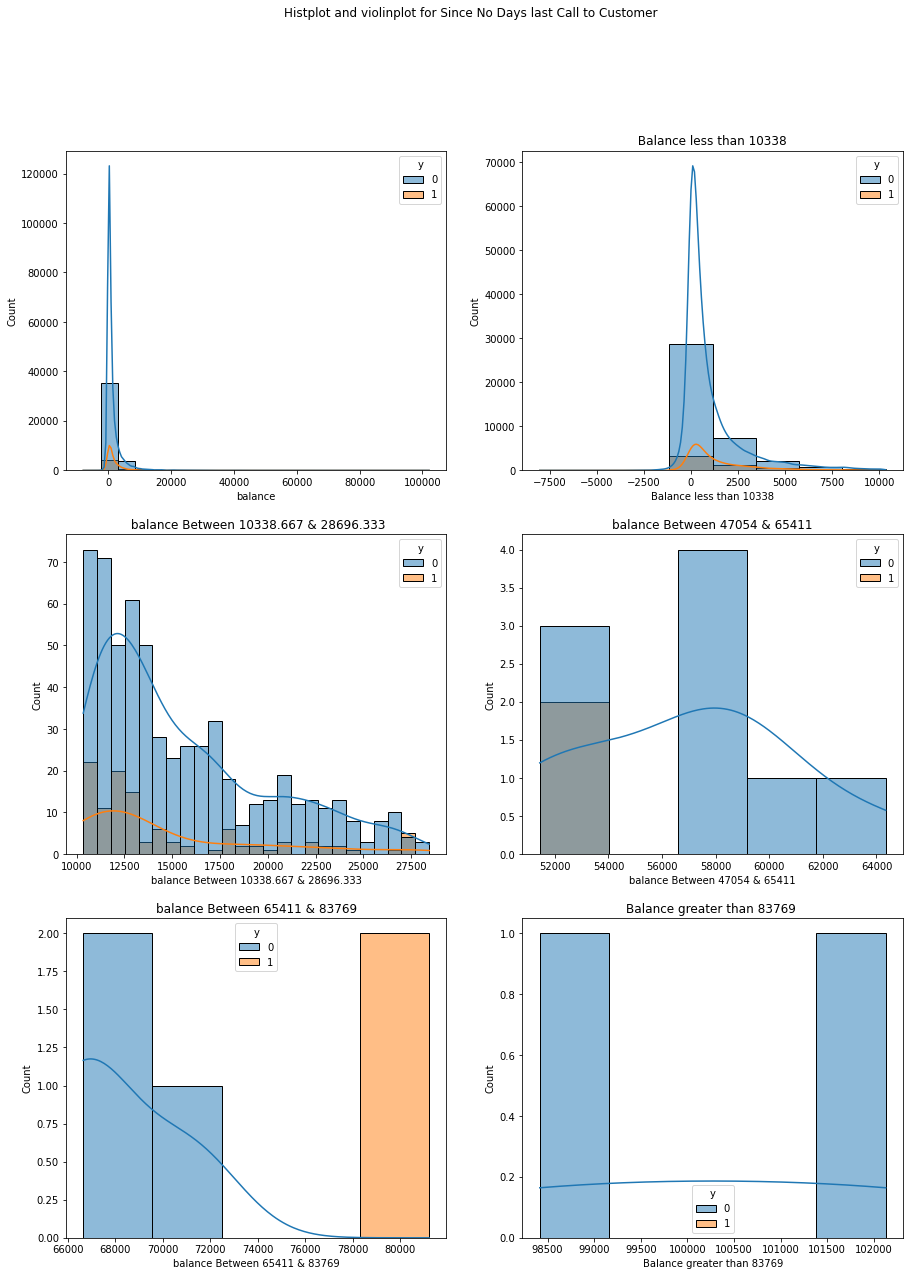

In [31]:
## Finding Relation Based on balance of Customer and Subscription of Term Deposit
fig, axes = plt.subplots(3, 2, figsize=(15,20))
fig.suptitle('Histplot and violinplot for Since No Days last Call to Customer')
# Histplot
sns.histplot(ax=axes[0,0], data=df, x="balance",hue='y', bins=20,kde=True)
# Histplot  
p=sns.histplot(ax=axes[0,1], data=df, x=df[df['balance']<10338.667].balance,hue='y',bins=8,kde=True)
p.set_title(' Balance less than 10338 ')
p.set_xlabel('Balance less than 10338')
# Histplot  
p=sns.histplot(ax=axes[1,0], data=df, x=df[(df['balance']>10338.667) & (df['balance']<=28696.333)].balance,hue='y',bins=25,kde=True)
p.set_title(' balance Between 10338.667 & 28696.333')
p.set_xlabel('balance Between 10338.667 & 28696.333')
# Histplot  
p=sns.histplot(ax=axes[1,1], data=df, x=df[(df['balance']>47054) & (df['balance']<=65411)].balance,hue='y',bins=5,kde=True)
p.set_title('balance Between 47054 & 65411')
p.set_xlabel('balance Between 47054 & 65411')
# Histplot  
p=sns.histplot(ax=axes[2,0], data=df, x=df[(df['balance']>65411) & (df['balance']<=83769)].balance,hue='y',bins=5,kde=True)
p.set_title('balance Between 65411 & 83769')
p.set_xlabel('balance Between 65411 & 83769')
# Histplot   
q=sns.histplot(ax=axes[2,1], data=df, x=df[df['balance']>83769].balance,hue='y',bins=5,kde=True)
q.set_title('Balance greater than 83769 ')
q.set_xlabel('Balance greater than 83769')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


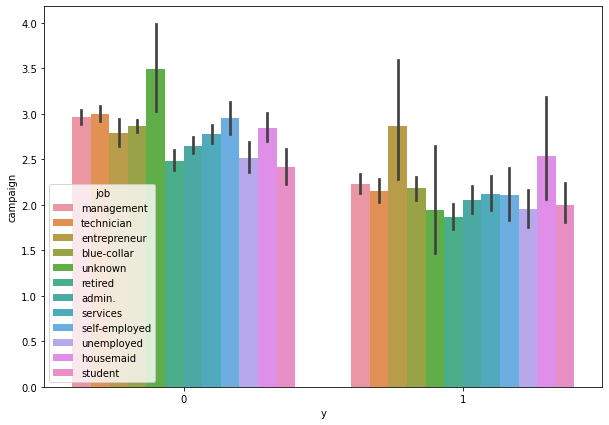

In [32]:
# Adding hue 
plt.figure(figsize=(10,7))
sns.barplot(df['y'], df['campaign'], hue=df['job'])
plt.show()

Q. Which age range has the maximum conversion range ? 

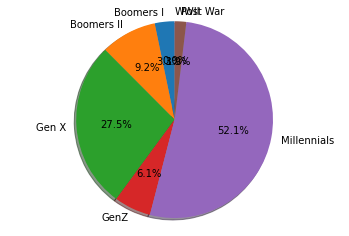

In [33]:
labels = 'Boomers I', 'Boomers II', 'Gen X', 'GenZ', 'Millennials','Post War', 'WWII'
sizes = [172,  487, 1452,  320, 2757,  100,    1]


fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [34]:
a = df.groupby("Age_range").agg({"y" : "sum"})
b = df.Age_range.value_counts().rename_axis('Generation').reset_index(name='Total_Count')
c= a.merge(b, left_on='Age_range', right_on='Generation')
c['Percetage_yes'] = c.y /  c.Total_Count
c


,y,Generation,Total_Count,Percetage_yes
0,172,Boomers I,405,0.42
1,487,Boomers II,2660,0.18
2,1452,Gen X,15909,0.09
3,320,GenZ,1336,0.24
4,2757,Millennials,24672,0.11
5,100,Post War,226,0.44
6,1,WWII,3,0.33


Q. What is the distribution of people joining and not joining the term deposite ?

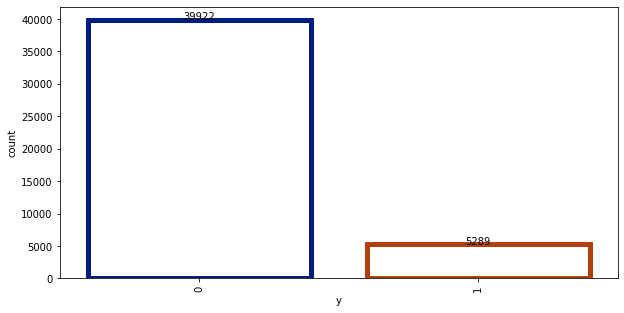

In [35]:
fig, ax1 = plt.subplots(figsize=(10,5))
graph = sns.countplot(x="y", data=df,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
i=0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,
        df['y'].value_counts()[i],ha="center")
    i += 1

Q. Run a visual analysis on all categorical variables and split it wrt. acceptance to term deposit.

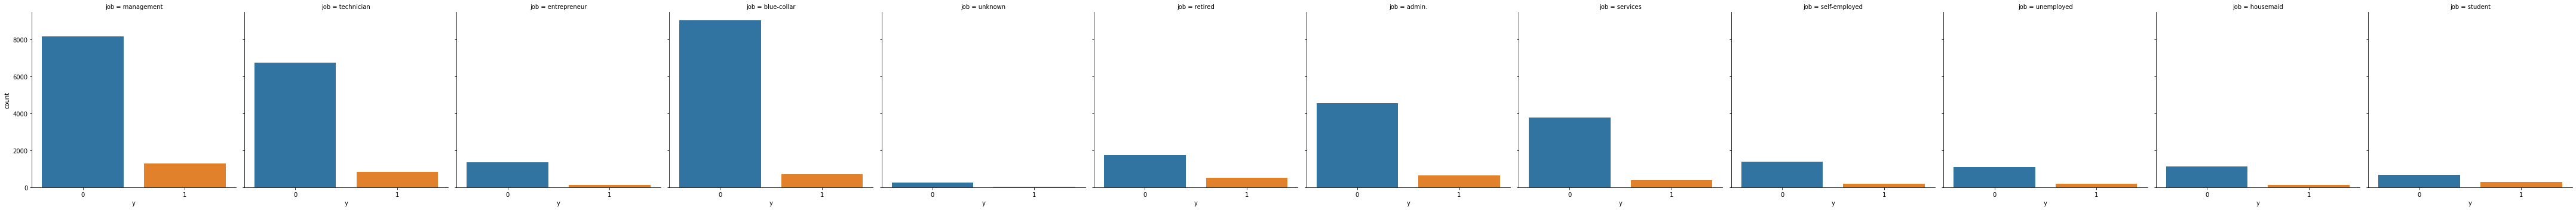

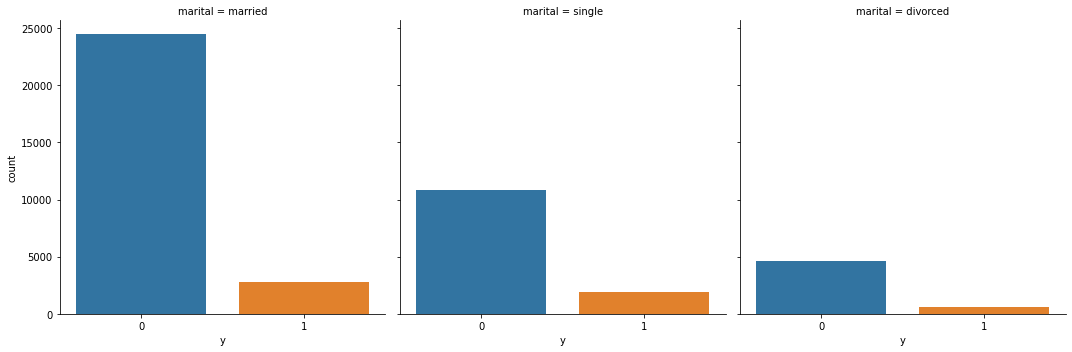

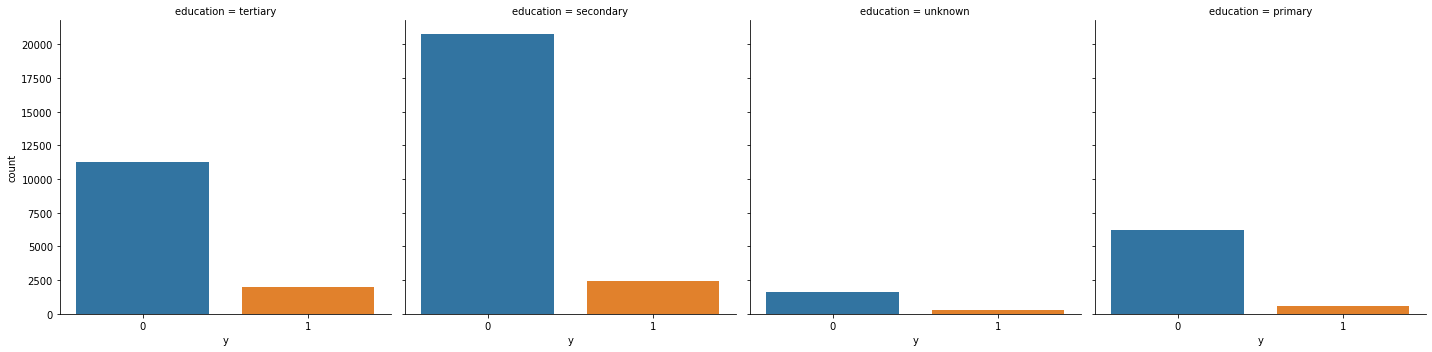

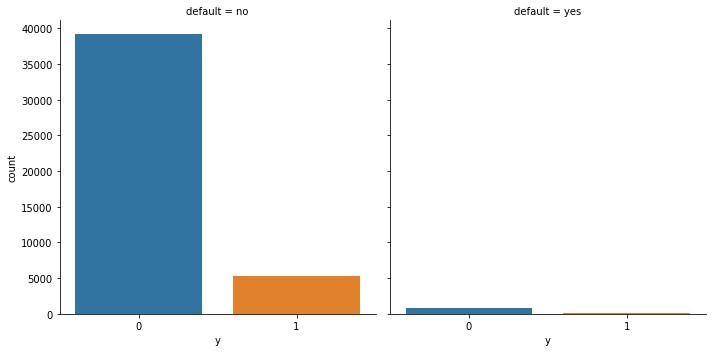

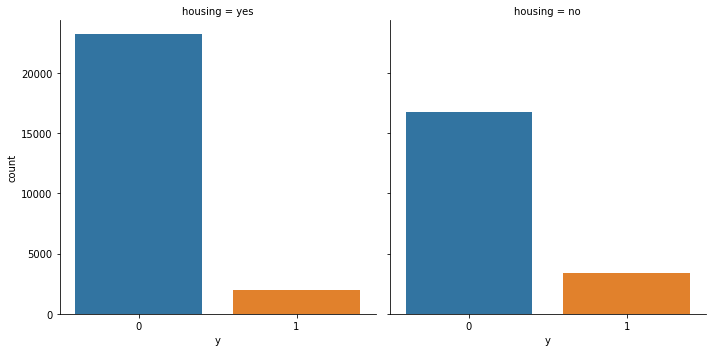

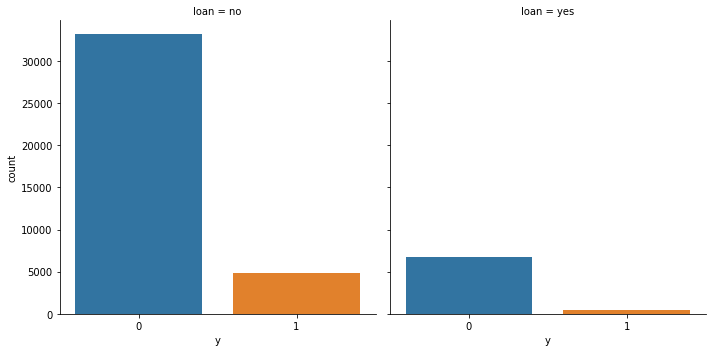

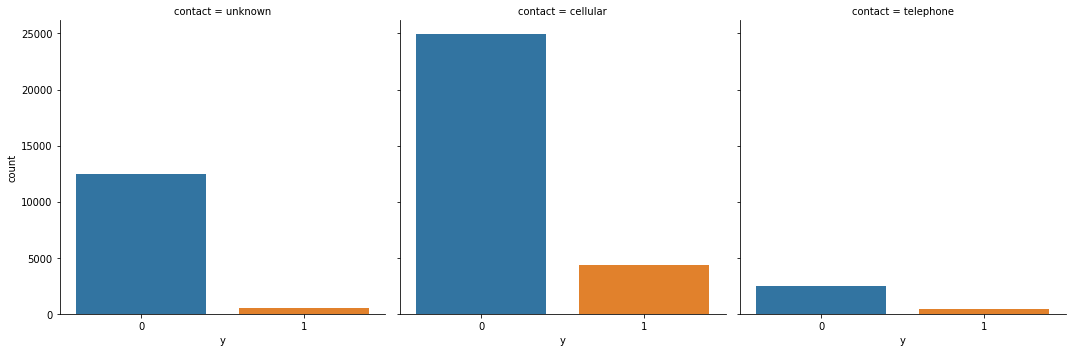

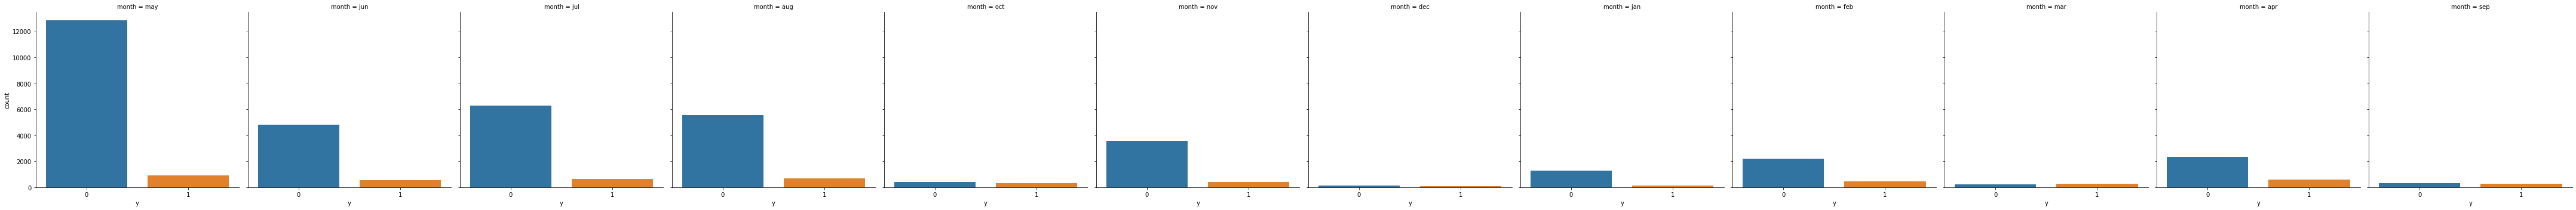

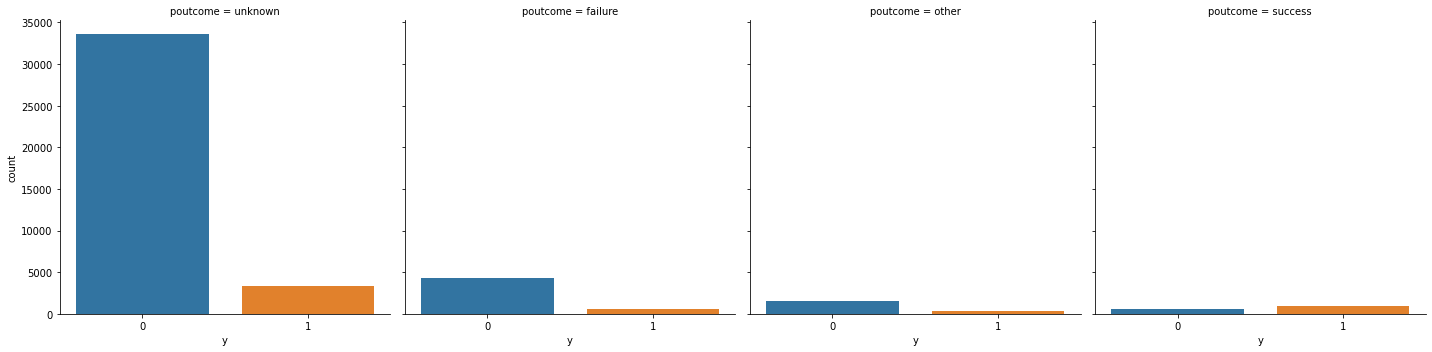

In [36]:
#check target label split over categorical features
#Find out the relationship between categorical variable and dependent variable

for categorical_feature in categorical_features:
    sns.catplot(x='y', col=categorical_feature, kind='count', data= df)

plt.show()

Q. Explore the impact of Eduation recived by the clients on the success of the campaign


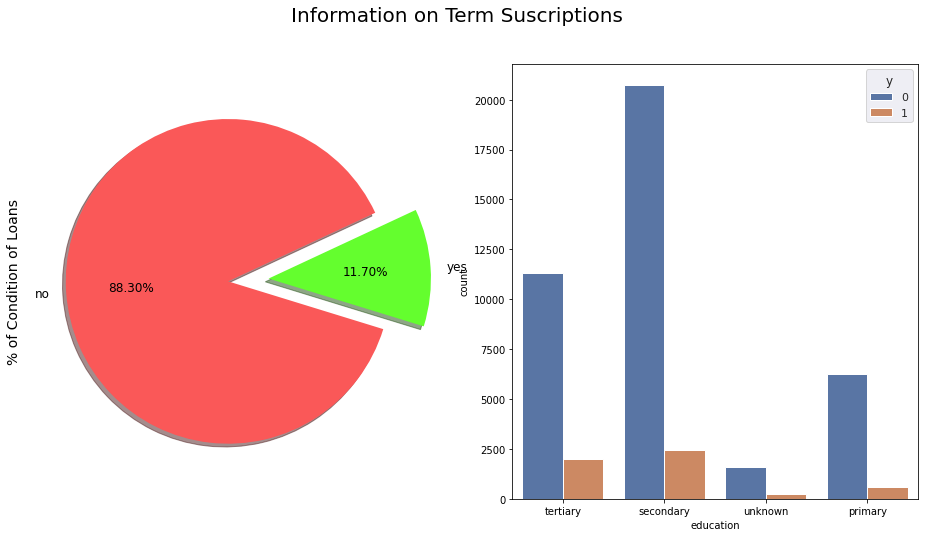

In [37]:
f, ax = plt.subplots(1,2, figsize=(16,8))

colors = ["#FA5858", "#64FE2E"]
labels ="no", "yes"

plt.suptitle('Information on Term Suscriptions', fontsize=20)

df["y"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors,  labels=labels, fontsize=12, startangle=25)


# ax[0].set_title('State of Loan', fontsize=16)
ax[0].set_ylabel('% of Condition of Loans', fontsize=14)

# sns.countplot('loan_condition', data=df, ax=ax[1], palette=colors)
# ax[1].set_title('Condition of Loans', fontsize=20)
# ax[1].set_xticklabels(['Good', 'Bad'], rotation='horizontal')
palette = [ "#FA5858","#64FE2E"]

sns.set_theme(style="darkgrid")

ax[1] = sns.countplot(x="education",  hue="y",data=df)

In [38]:
#number of contacts performed during previous campaign ('previous') and deposit
p_df = pd.DataFrame()
p_df['previous_yes'] = (df[df['y'] == 'yes'][['y','previous']].describe())['previous']
p_df['previous_no'] = (df[df['y'] == 'no'][['y','previous']].describe())['previous']

p_df

,previous_yes,previous_no
count,0.00,0.00
mean,NaN,NaN
std,NaN,NaN
min,NaN,NaN
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,NaN,NaN


In [39]:

#default features does not play imp role
df.groupby(['y','default']).size()

y  default
0  no         39159
   yes          763
1  no          5237
   yes           52
dtype: int64

##Outliers 

In [40]:
df[df.balance<0].describe()

,age,balance,day,duration,campaign,pdays,previous,y
count,3766.00,3766.00,3766.00,3766.00,3766.00,3766.00,3766.00,3766.00
mean,39.48,-317.68,16.44,252.10,2.93,35.31,0.41,0.06
std,9.07,368.99,8.58,250.28,3.47,99.97,1.61,0.23
min,20.00,-8019.00,1.00,4.00,1.00,-1.00,0.00,0.00
25%,32.00,-422.00,9.00,105.00,1.00,-1.00,0.00,0.00
50%,38.00,-230.00,16.00,176.00,2.00,-1.00,0.00,0.00
75%,46.00,-93.00,24.00,305.00,3.00,-1.00,0.00,0.00
max,63.00,-1.00,31.00,3253.00,43.00,670.00,25.00,1.00


Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


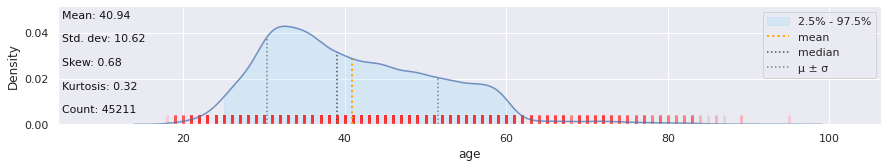

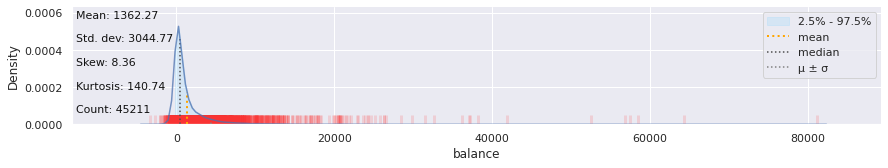

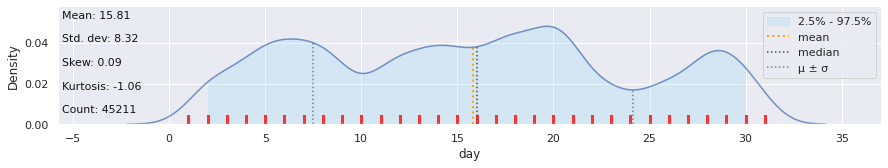

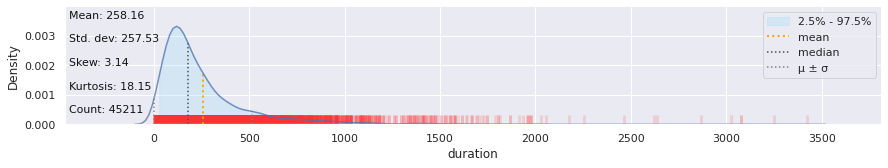

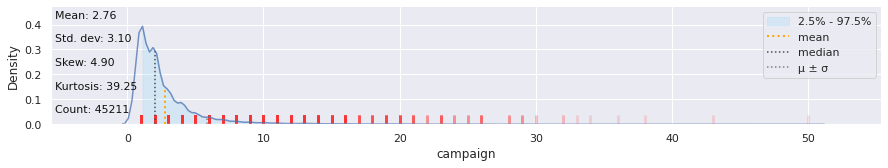

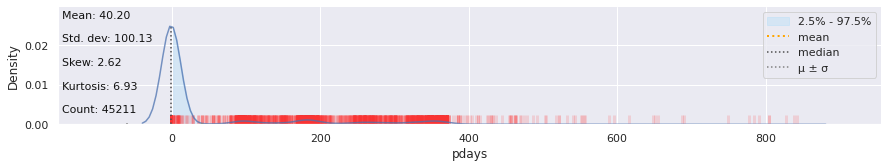

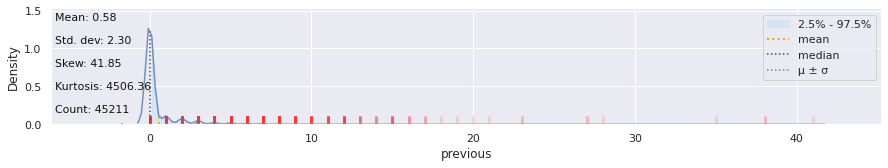

In [41]:
# default representation of a distribution plot
klib.dist_plot(df)

1.  Age plot is Showing Outliers to all customer who are having approximately age above 70 years, but we know that age above 70 is not outliers but its variance or spred of data, and custmer above age 70 are very important for us because they show the maximum percentage of people who convert for the tterm depost during the campaine. 

2. lets cap previous at 30. 

3. lets cap campaign at 35. 

4. lets cap Duration at 3000. 


In [42]:
# Lets Cap previous at 30 
df = df[df.previous <= 30]

In [43]:
# Lets Cap campaign at 35 
df = df[df.campaign <= 35]

In [44]:
# Lets Cap duration	 at 3000 
df = df[df.duration	 <= 3000]

In [45]:
2. # Lets Cap Outliers @ Balance 40000 
df = df[df.balance <= 40000]
df = df[df.balance >= -1000]

In [46]:
# Lets Cap previous at 50 
df = df[df.previous <= 50]

#Correlation in variables (both dependent and independent)

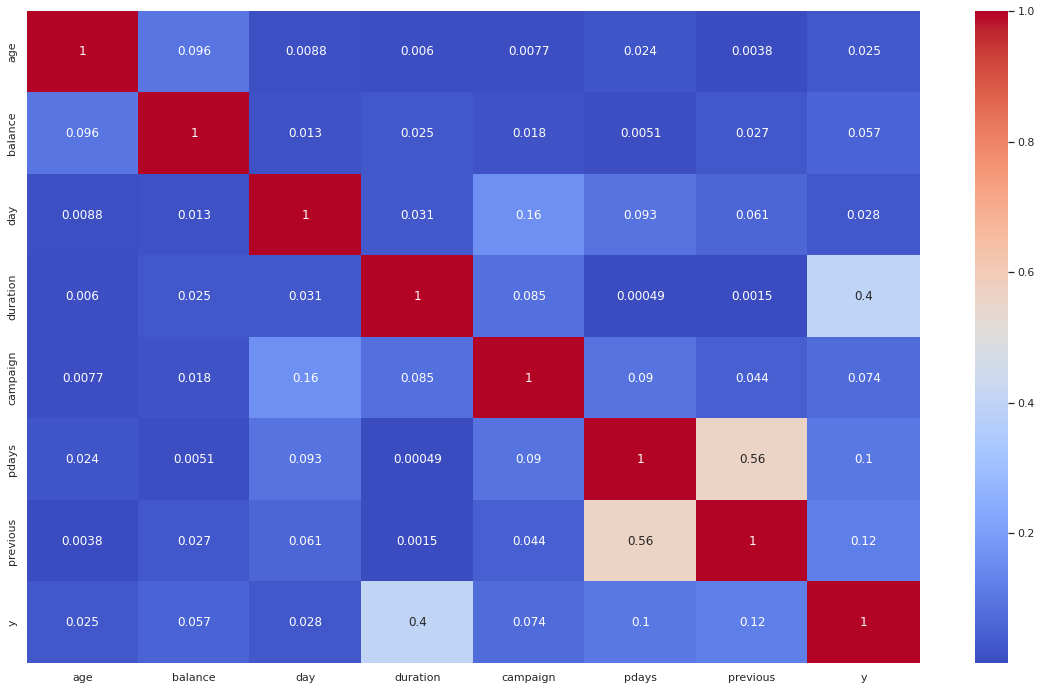

In [47]:
plt.figure(figsize=(20,12))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')


VIF

In [48]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif.sort_values(by='VIF',ascending=False).reset_index(drop=True))

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [49]:
calc_vif(df[[i for i in df.describe().columns if i not in ['y']]])

,variables,VIF
0,age,5.08
1,day,4.00
2,duration,1.94
3,campaign,1.89
4,pdays,1.69
5,previous,1.61
6,balance,1.26


#Feature engineering 


In [50]:
df.drop('age', axis=1, inplace=True)

In [51]:
# Defining categories 

categorical_features  = ['job', 'marital', 'education', 'contact', 'month','poutcome','Age_range']

#Creating dummies
df_m=pd.get_dummies(df, columns = categorical_features,drop_first=False)

#label encoding 
boolean_columns = ['housing', 'loan', 'default']
for col in  boolean_columns:
    df_m[col+'_new']=df_m[col].apply(lambda x : 1 if x == 'yes' else 0)
    df_m.drop(col, axis=1, inplace=True)

In [52]:
df_m.head()

,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,Age_range_Boomers I,Age_range_Boomers II,Age_range_Gen X,Age_range_GenZ,Age_range_Millennials,Age_range_Post War,Age_range_WWII,housing_new,loan_new,default_new
0,2143,5,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0
1,29,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0
2,2,5,76,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0
3,1506,5,92,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0
4,1,5,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0


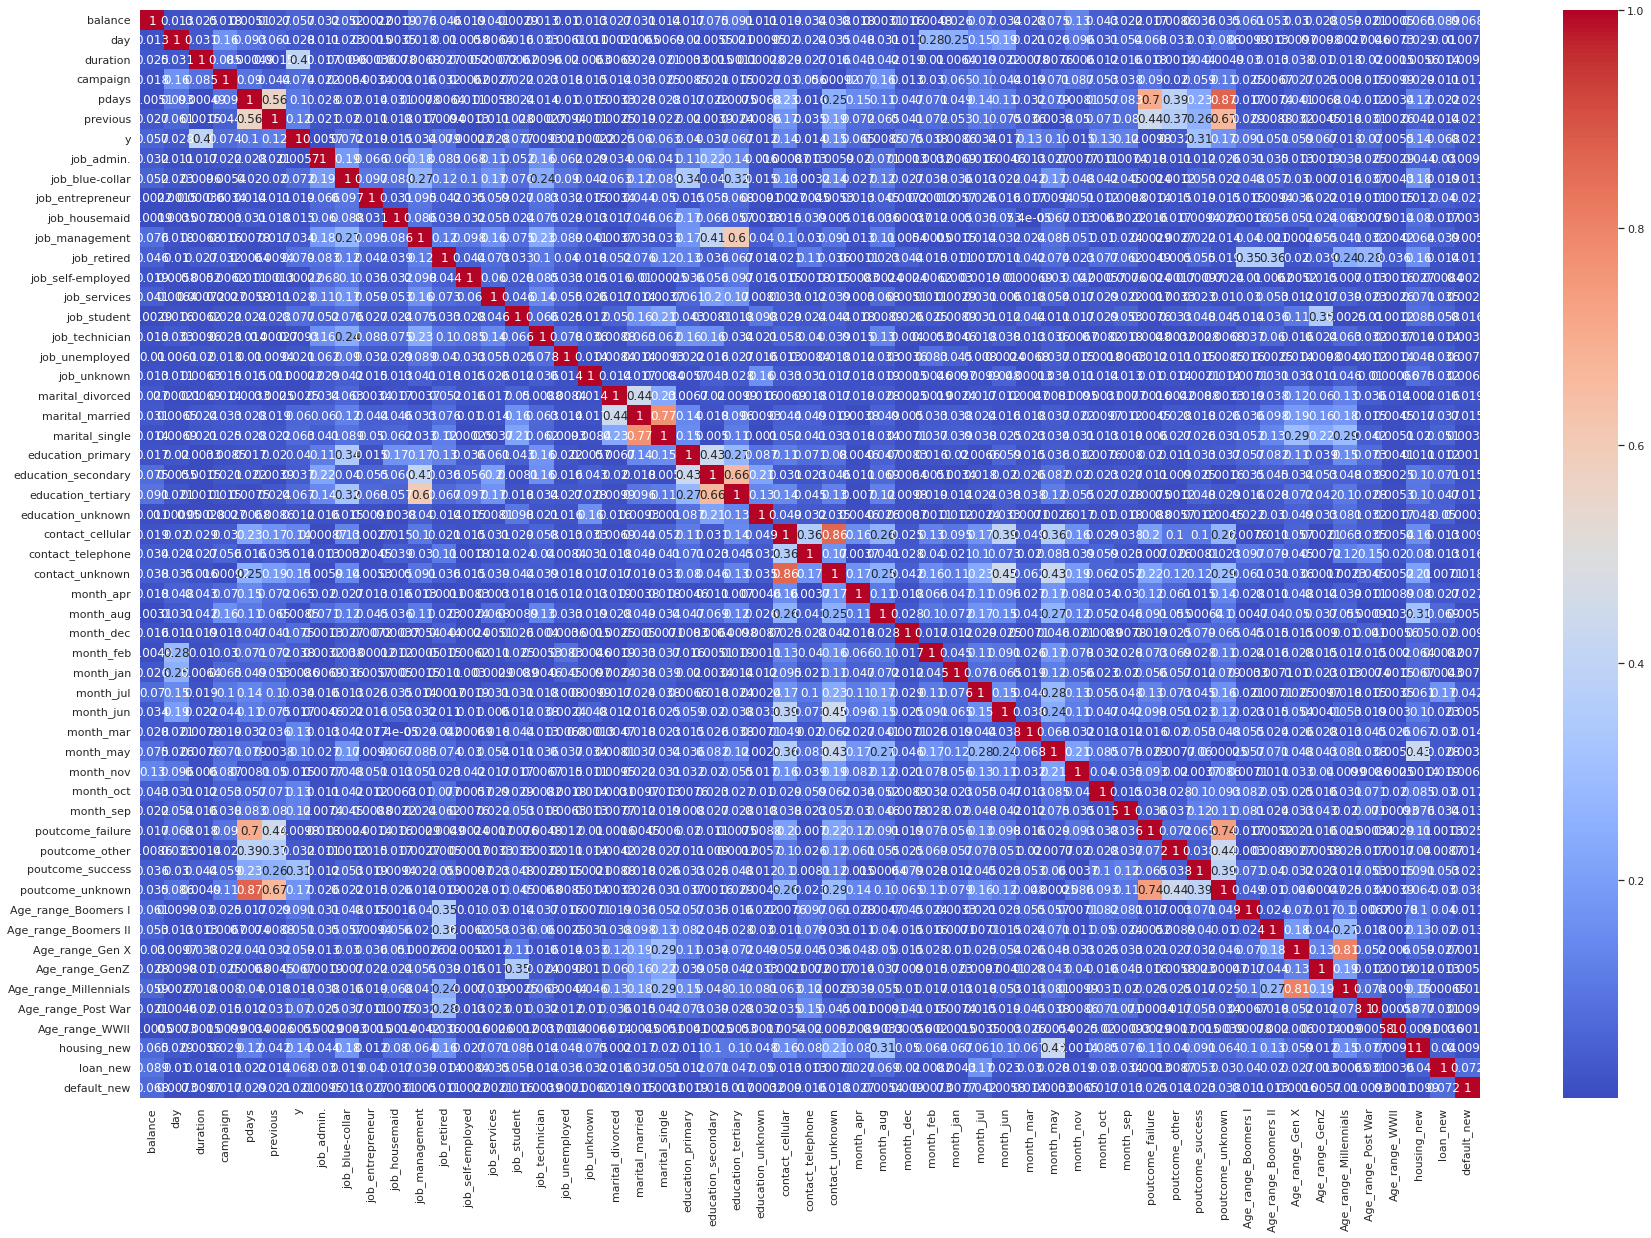

In [53]:
plt.figure(figsize=(30,20))
correlation = df_m.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

we see that none of the feature has high coorealtion with the target variable hence we move towards model building 


Train test split

In [54]:
X = df_m.drop(['y'],axis=1)
y = df_m['y']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=34)
print(X_train.shape)
print(X_test.shape)

(35992, 54)
(8998, 54)


# Oversampling using SMOTE
SMOTE(Synthetic Minority Oversampling Technique)
The dataset is imbalanced which can lead to biasness while building the model. To avoid this we use SMOTE.

SMOTE is an algorithm that performs data augmentation by creating synthetic data points based on the original data points.

In [55]:
import imblearn
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 0)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [56]:
y.value_counts()

0    39719
1     5271
Name: y, dtype: int64

In [57]:
df.shape

(44990, 17)

In [58]:
print ('original dataset length',len(X))
print ('Resample dataset length',len(X_train_sm))

original dataset length 44990
Resample dataset length 63606


Scaling on Data set

In [59]:
# Transforming data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_sm = scaler.fit_transform(X_train_sm)
X_test = scaler.transform(X_test)

# Machine learning models 

**Model building** 


We will start by building simple classifiers models and work our way upto more complex models. but first lets start by defining some important function's.

In [63]:
def fit_mod(model, X_train, X_test, y_train, y_test):

  '''Takes Classifier model and train test splits as input and prints the
  evaluation matrices with the plot and returns the model'''
  global modelprediction
  # Fitting the model

  model.fit(X_train, y_train)
  modelprediction = model.predict(X_test)
  model_accuracy = accuracy_score(y_test, modelprediction) 


  print("Training accuracy Score    : ",model.score(X_train, y_train))
  print("Testing accuracy Score : ",model_accuracy )


  print(classification_report(modelprediction,y_test))

  '''


  '''

def confu_mat(model, X_train, X_test, y_train, y_test):

 from sklearn.metrics import confusion_matrix

 conf_matrix = confusion_matrix(y_test, modelprediction)

 
 f, ax = plt.subplots(figsize=(10, 6))
 sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=.5, ax=ax)
 plt.title("Confusion Matrix", fontsize=15)
 plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
 ax.set_yticks(np.arange(conf_matrix.shape[0]) + 0.5, minor=False)
 ax.set_xticklabels("Refused T. Deposits', 'Accepted T. Deposits")
 ax.set_yticklabels(['Refused T. Deposits', 'Accepted T. Deposits'], fontsize=16, rotation=360)
 plt.show()



'''

'''
def Roc_curve(model, X_train, X_test, y_train, y_test):

  model_probability = model.predict_proba(X_test)[:,1]


  roc_score=roc_auc_score(y_test, model_probability)

  from sklearn.metrics import roc_curve
  fpr, tpr, _ = roc_curve(y_test, model_probability)
  
  
  name= model
  
  plt.title( 'ROC curve')
  plt.xlabel('FPR (Precision)')
  plt.ylabel('TPR (Recall)')

  plt.plot(fpr,tpr)
  plt.plot((0,1), ls='dashed',color='black')
  plt.show()
  return roc_score,fpr,tpr,model_probability

  '''

  '''
def imp_fe(model):

#best_estimator_.feature_importances_

  try:
    features = X.columns
    importances = model.feature_importances_
    indices = np.argsort(importances)
  except:
    features = X.columns
    importances = model.best_estimator_.feature_importances_
    indices = np.argsort(importances)


 
  plt.figure(figsize=(30,25))
  plt.title('Feature Importance')
  plt.barh(range(len(indices)), importances[indices], color='red', align='center')
  plt.yticks(range(len(indices)), [features[i] for i in indices])
  plt.xlabel('Relative Importance')
  plt.show()





def fit_mod1(model, X_train, X_test, y_train, y_test):

  '''Takes Classifier model and train test splits as input and prints the
  evaluation matrices with the plot and returns the model'''
  #global modelprediction
  # Fitting the model

  #model.fit(X_train, y_train)
  modelprediction = model.predict(X_test)
  model_accuracy = accuracy_score(y_test, modelprediction) 


  print("Training accuracy Score    : ",model.score(X_train, y_train))
  print("Testing accuracy Score : ",model_accuracy )


  print(classification_report(modelprediction,y_test))


# Defining a function to train the input model and print evaluation matrix
def analyse_model(model, X_train, X_test, y_train, y_test):

  '''Takes classifier model and train test splits as input and prints the
  evaluation matrices with the plot and returns the model'''

  # Fitting the model
  model.fit(X_train,y_train)

  # Feature importances
  try:
    try:
      importance = model.feature_importances_
      feature = features
    except:
      importance = np.abs(model.coef_[0])
      feature = independent_variables
    indices = np.argsort(importance)
    indices = indices[::-1]
  except:
    pass

  # Plotting Evaluation Metrics for train and test dataset
  for x, act, label in ((X_train, y_train, 'Train-Set'),(X_test, y_test, "Test-Set")):

    # Getting required metrics
    pred = model.predict(x)
    pred_proba = model.predict_proba(x)[:,1]
    report = pd.DataFrame(classification_report(y_pred=pred, y_true=act, output_dict=True))
    fpr, tpr, thresholds = roc_curve(act, pred_proba)

    # Classification report
    plt.figure(figsize=(18,3))
    plt.subplot(1,3,1)
    sns.heatmap(report.iloc[:-1, :-1].T, annot=True, cmap='coolwarm')
    plt.title(f'{label} Report')

    # Confusion Matrix
    plt.subplot(1,3,2)
    sns.heatmap(confusion_matrix(y_true=act, y_pred=pred), annot=True, cmap='coolwarm')
    plt.title(f'{label} Confusion Matrix')
    plt.xlabel('Predicted labels')
    plt.ylabel('Actual labels')
    
    # AUC_ROC Curve
    plt.subplot(1,3,3)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr,label=f'AUC = {np.round(np.trapz(tpr,fpr),3)}')
    plt.legend(loc=4)
    plt.title(f'{label} AUC_ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.tight_layout()

  # Plotting Feature Importance
  try:
    plt.figure(figsize=(18,3))
    plt.bar(range(len(indices)),importance[indices])
    plt.xticks(range(len(indices)), [feature[i] for i in indices])
    plt.title('Feature Importance')
    plt.tight_layout()
  except:
    pass
  plt.show()

  return model



## LogisticRegression

without over sampling 

In [61]:
lr = LogisticRegression(fit_intercept=True, max_iter=10000)

fit_mod(lr, X_train, X_test, y_train, y_test)

Training accuracy Score    :  0.9023116248055123
Testing accuracy Score :  0.8850855745721271
              precision    recall  f1-score   support

           0       1.00      0.89      0.94      8898
           1       0.07      0.74      0.13       100

    accuracy                           0.89      8998
   macro avg       0.53      0.81      0.53      8998
weighted avg       0.99      0.89      0.93      8998



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


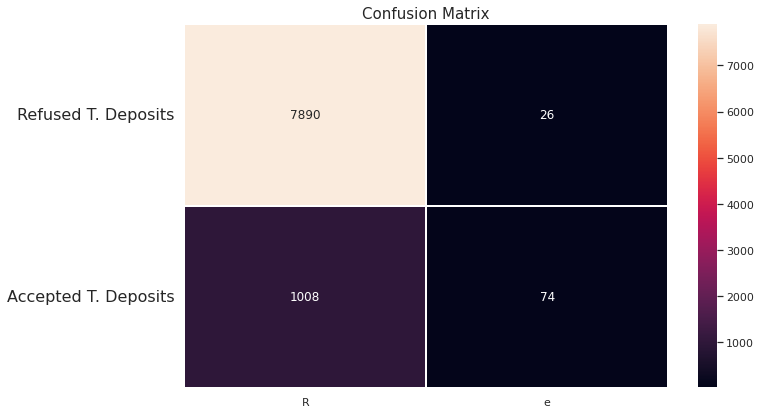

In [62]:
confu_mat(lr, X_train, X_test, y_train, y_test)

with over sampling

In [63]:
lr = LogisticRegression(fit_intercept=True, max_iter=10000)

fit_mod(lr, X_train_sm, X_test, y_train_sm, y_test)

Training accuracy Score    :  0.9443448731251769
Testing accuracy Score :  0.8998666370304512
              precision    recall  f1-score   support

           0       0.97      0.92      0.94      8419
           1       0.35      0.66      0.46       579

    accuracy                           0.90      8998
   macro avg       0.66      0.79      0.70      8998
weighted avg       0.93      0.90      0.91      8998



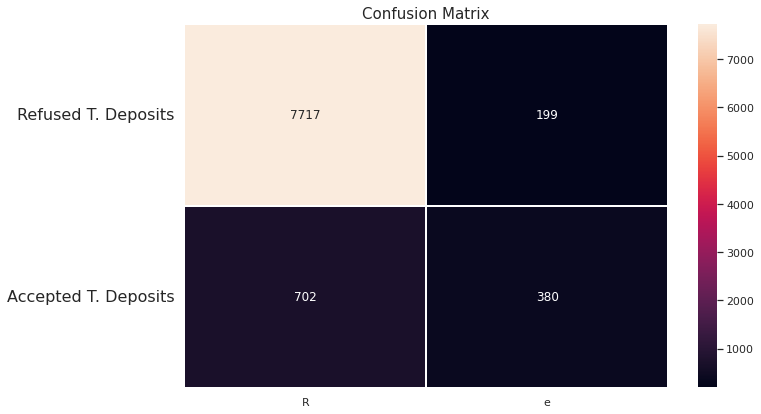

In [64]:
confu_mat(lr, X_train_sm, X_test, y_train_sm, y_test)

with hyper parameter tuning 

In [65]:
param_grid = {'penalty':['l1','l2'], 'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

In [66]:
grid_lr = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3,error_score="raise",)


fit_mod(grid_lr, X_train_sm, X_test, y_train_sm, y_test)

Fitting 3 folds for each of 14 candidates, totalling 42 fits
Training accuracy Score    :  0.944612143508474
Testing accuracy Score :  0.8995332296065792
              precision    recall  f1-score   support

           0       0.97      0.92      0.94      8416
           1       0.35      0.65      0.46       582

    accuracy                           0.90      8998
   macro avg       0.66      0.78      0.70      8998
weighted avg       0.93      0.90      0.91      8998



In [67]:
grid_lr.best_estimator_

LogisticRegression(C=1000, solver='liblinear')

In [68]:
grid_lr.best_params_

{'C': 1000, 'penalty': 'l2'}

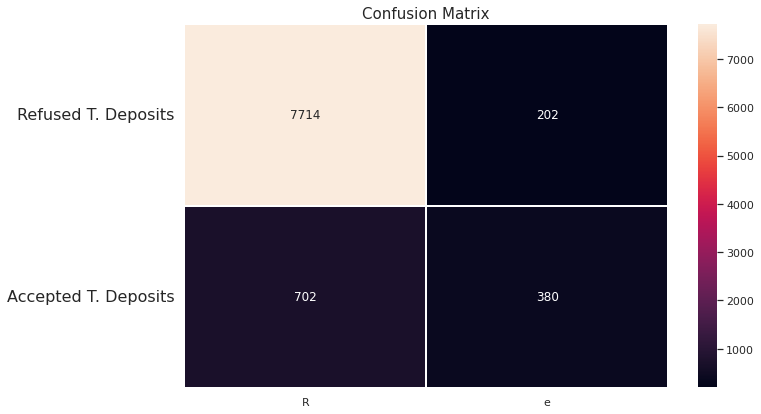

In [69]:
confu_mat(grid_lr, X_train_sm, X_test, y_train_sm, y_test)

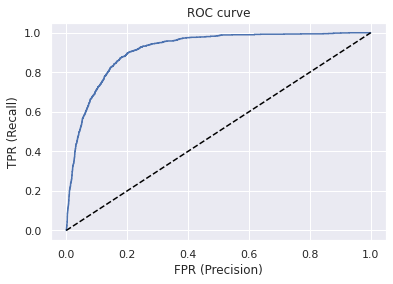

0.9138691940047019

In [70]:
roc_score_lr,lr_fpr,lr_tpr,lr_probability = Roc_curve(grid_lr, X_train, X_test, y_train, y_test)
roc_score_lr

## Decision Tree Classifier

With oversampling data

In [71]:
dt = DecisionTreeClassifier()

fit_mod(dt, X_train_sm, X_test, y_train_sm, y_test)

Training accuracy Score    :  1.0
Testing accuracy Score :  0.8703045121138031
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      7831
           1       0.50      0.46      0.48      1167

    accuracy                           0.87      8998
   macro avg       0.71      0.70      0.70      8998
weighted avg       0.87      0.87      0.87      8998



we observe that the data is overfitting as the model is performing very well on training data set and not on testing data set.

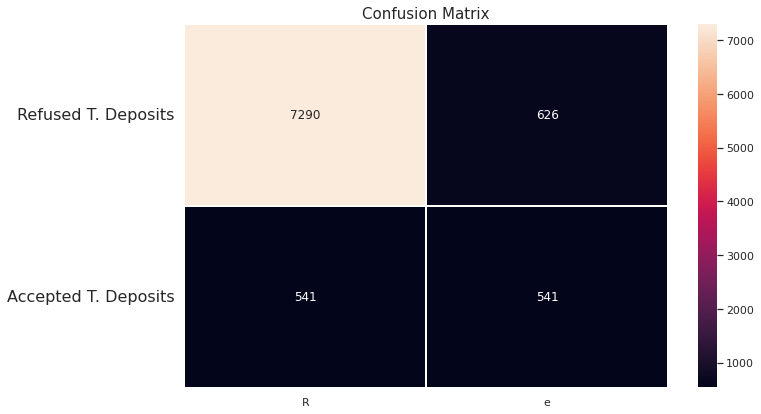

In [72]:
confu_mat(dt, X_train, X_test, y_train, y_test)

With hyper parameters tuning 

In [73]:
param_grid = {'max_depth': [20,30,50,100], 'min_samples_split':[0.01,0.05,0.1]}

In [74]:
dt_grid = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 5)
fit_mod(dt_grid, X_train_sm, X_test, y_train_sm, y_test)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Training accuracy Score    :  0.9103700908719303
Testing accuracy Score :  0.8845298955323405
              precision    recall  f1-score   support

           0       0.92      0.95      0.93      7663
           1       0.64      0.52      0.57      1335

    accuracy                           0.88      8998
   macro avg       0.78      0.73      0.75      8998
weighted avg       0.88      0.88      0.88      8998



In [75]:
dt_grid.best_params_

{'max_depth': 20, 'min_samples_split': 0.01}

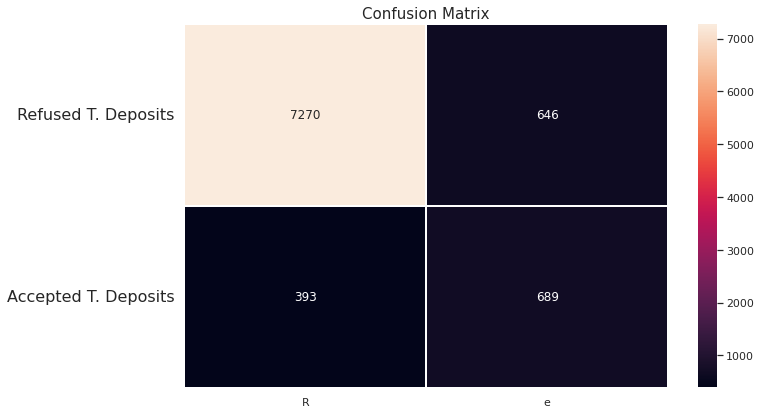

In [76]:
confu_mat(dt_grid, X_train_sm, X_test, y_train, y_test)

ROC AOC Curve for Decision Tree Classifier

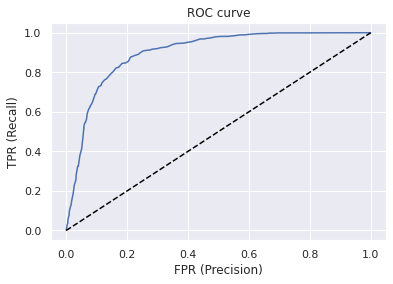

0.8982138820835033

In [77]:
roc_score_dt,dt_fpr,dt_tpr,dt_probability = Roc_curve(dt_grid, X_train_sm, X_test, y_train_sm, y_test)
roc_score_dt

## Random Forest Classifier


with oversampled data 

In [78]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

fit_mod(rfc, X_train_sm, X_test, y_train_sm, y_test)

Training accuracy Score    :  0.9999842782127473
Testing accuracy Score :  0.902867303845299
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      8252
           1       0.44      0.64      0.52       746

    accuracy                           0.90      8998
   macro avg       0.70      0.78      0.73      8998
weighted avg       0.92      0.90      0.91      8998



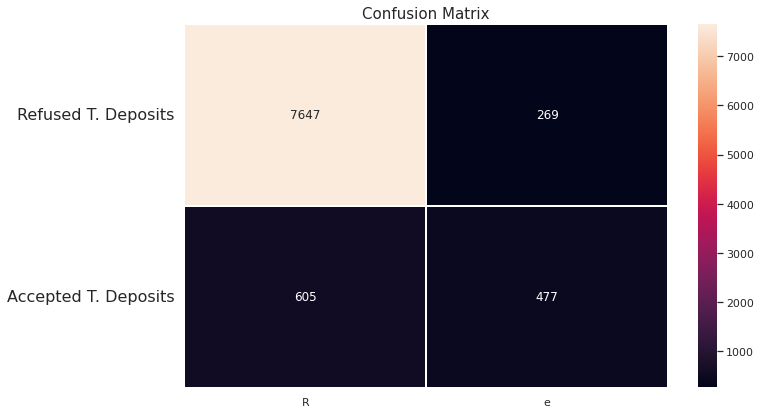

In [79]:
confu_mat(rfc, X_train_sm, X_test, y_train_sm, y_test)

with hyper parameter tuning 

In [80]:
#Hyperparameter Grid
param_grid = {'max_depth': [20,30,50,100], 'min_samples_split':[0.1,0.2,0.4]}

In [81]:
param_dict={'max_depth': [20],
            'min_samples_leaf': [0.01,0.1,1,5],
            'min_samples_split': [ 0.01,2,5,10],
            'n_estimators': [500]}

In [82]:
#implementating RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
#Creating an instance of the RandomForestClassifier
rfc = RandomForestClassifier()
#random search 
rfc_grid = RandomizedSearchCV(estimator=rfc,param_distributions=param_dict,cv=5,verbose=2,scoring='roc_auc',n_iter=5,random_state=0)
fit_mod(rfc_grid, X_train_sm, X_test, y_train_sm, y_test)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END max_depth=20, min_samples_leaf=0.01, min_samples_split=2, n_estimators=500; total time=  14.0s
[CV] END max_depth=20, min_samples_leaf=0.01, min_samples_split=2, n_estimators=500; total time=  13.6s
[CV] END max_depth=20, min_samples_leaf=0.01, min_samples_split=2, n_estimators=500; total time=  13.2s
[CV] END max_depth=20, min_samples_leaf=0.01, min_samples_split=2, n_estimators=500; total time=  13.3s
[CV] END max_depth=20, min_samples_leaf=0.01, min_samples_split=2, n_estimators=500; total time=  13.0s
[CV] END max_depth=20, min_samples_leaf=0.1, min_samples_split=5, n_estimators=500; total time=   7.2s
[CV] END max_depth=20, min_samples_leaf=0.1, min_samples_split=5, n_estimators=500; total time=   7.0s
[CV] END max_depth=20, min_samples_leaf=0.1, min_samples_split=5, n_estimators=500; total time=   6.9s
[CV] END max_depth=20, min_samples_leaf=0.1, min_samples_split=5, n_estimators=500; total time=   7.1s
[CV] END

In [83]:
rfc_grid.best_params_

{'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 500}

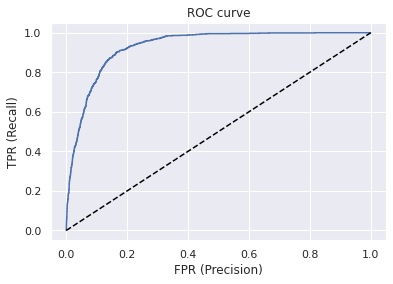

0.9308393165203209

In [84]:
roc_score_rfc,rfc_fpr,rfc_tpr,rfc_probability = Roc_curve(rfc_grid, X_train, X_test, y_train, y_test)
roc_score_rfc

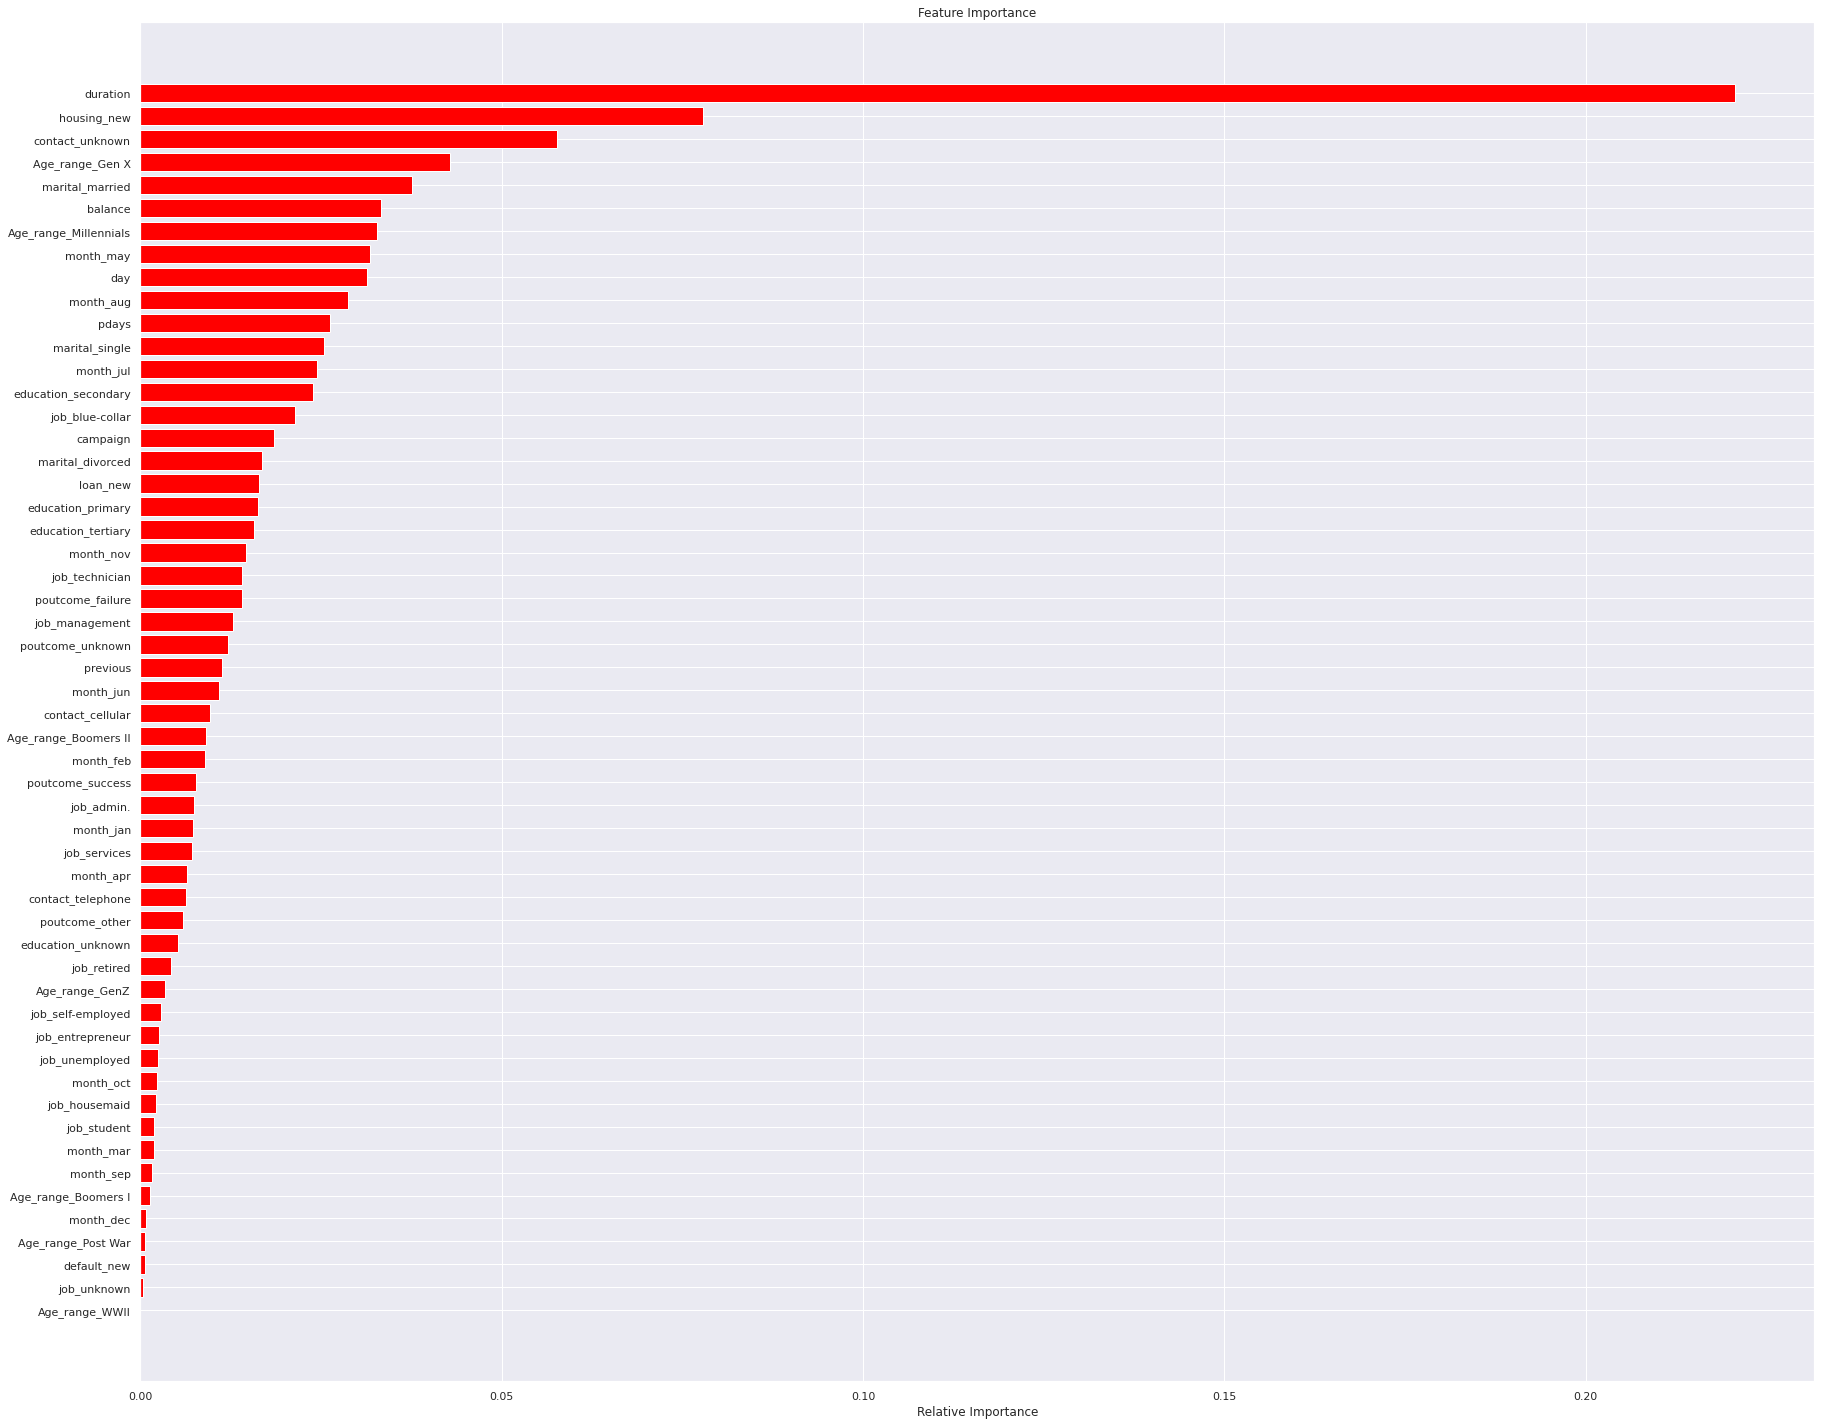

In [85]:
imp_fe(rfc_grid)

## Gradient Boosting Classifier

with over sampled data 

In [86]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)

fit_mod(gbc, X_train_sm, X_test, y_train_sm, y_test)

Training accuracy Score    :  0.9417193346539635
Testing accuracy Score :  0.9008668593020671
              precision    recall  f1-score   support

           0       0.96      0.93      0.94      8188
           1       0.46      0.62      0.53       810

    accuracy                           0.90      8998
   macro avg       0.71      0.77      0.74      8998
weighted avg       0.92      0.90      0.91      8998



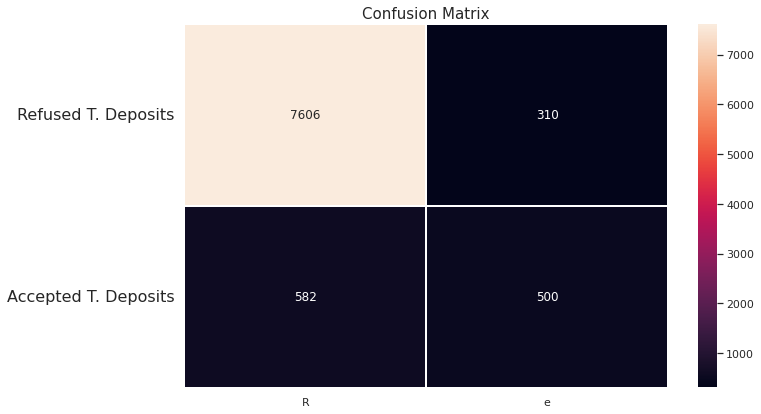

In [87]:
confu_mat(gbc, X_train_sm, X_test, y_train, y_test)

With hyper parameter tuning 

In [88]:
n_estimators=[60,80,100]
max_depth=[15,20]
max_leaf_nodes=[40,60,80]
params = {'n_estimators':n_estimators,'max_depth':max_depth ,'max_leaf_nodes':max_leaf_nodes}

In [89]:
gbc = GradientBoostingClassifier( random_state=0)
gb_grid= GridSearchCV(gbc,param_grid=params,verbose=0,cv=3)
fit_mod(gb_grid, X_train_sm, X_test, y_train_sm, y_test)

Training accuracy Score    :  0.9727855862654466
Testing accuracy Score :  0.9090909090909091
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      8084
           1       0.54      0.64      0.59       914

    accuracy                           0.91      8998
   macro avg       0.75      0.79      0.77      8998
weighted avg       0.92      0.91      0.91      8998



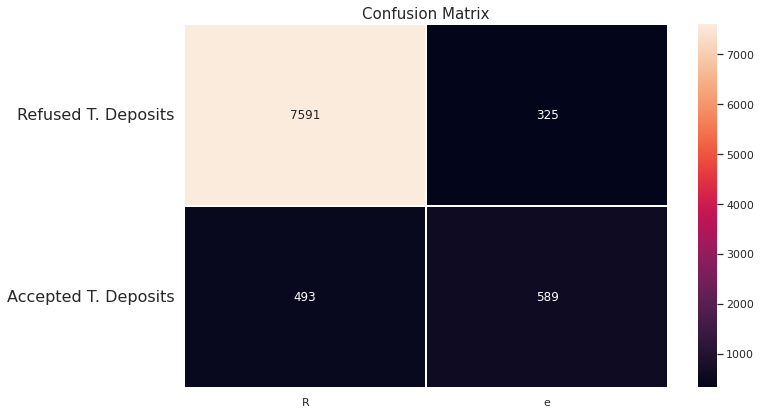

In [90]:
confu_mat(gb_grid, X_train_sm, X_test, y_train, y_test)

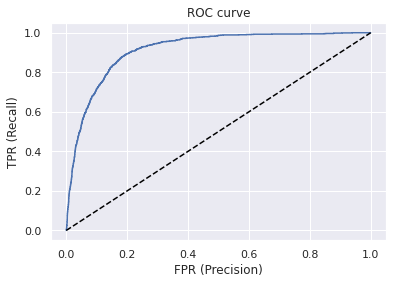

0.9135791802839239

In [91]:
gb_score_gb,gb_fpr,gb_tpr,gb_probability = Roc_curve(lr, X_train, X_test, y_train, y_test)
gb_score_gb

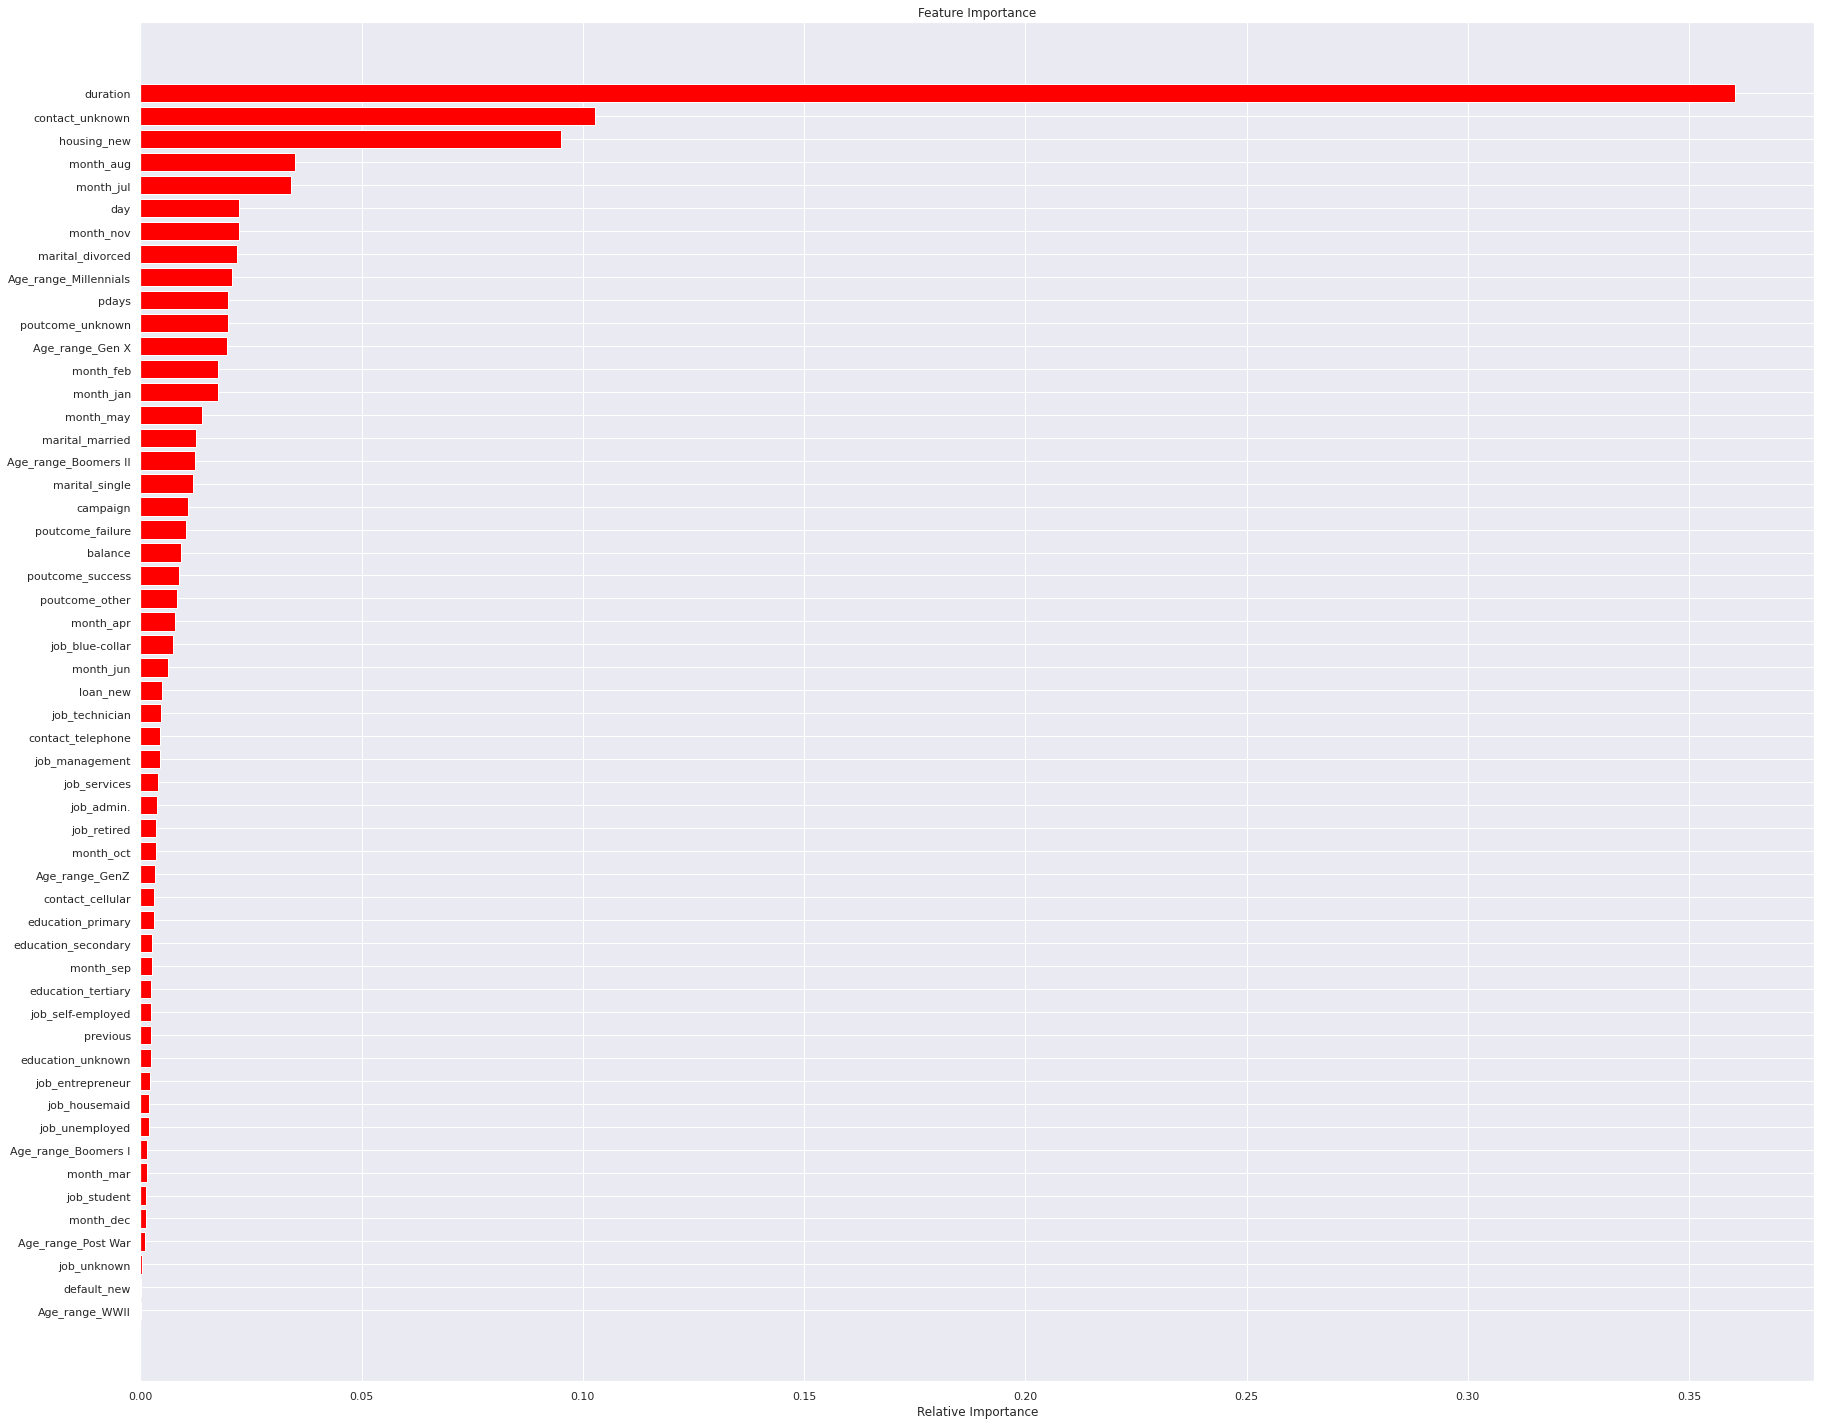

In [92]:
imp_fe(gb_grid)

## **K Neighbors Classifier**

With over sampled data 

In [93]:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier()


fit_mod(knc, X_train_sm, X_test, y_train_sm, y_test)

Training accuracy Score    :  0.9499889947489231
Testing accuracy Score :  0.8874194265392309
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      8313
           1       0.35      0.55      0.43       685

    accuracy                           0.89      8998
   macro avg       0.65      0.73      0.68      8998
weighted avg       0.91      0.89      0.90      8998



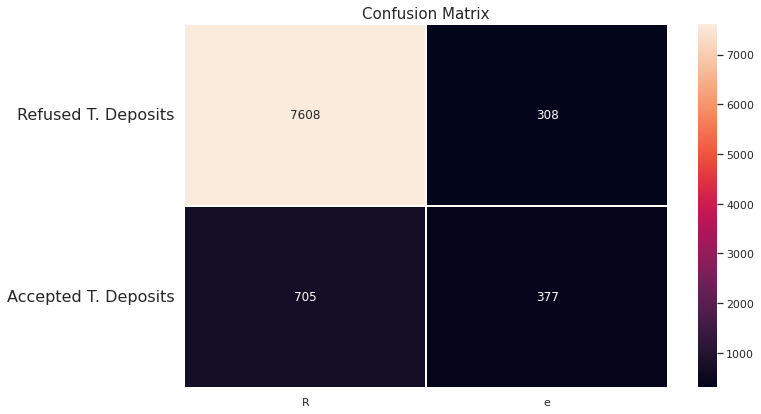

In [94]:
confu_mat(knc, X_train, X_test, y_train, y_test)

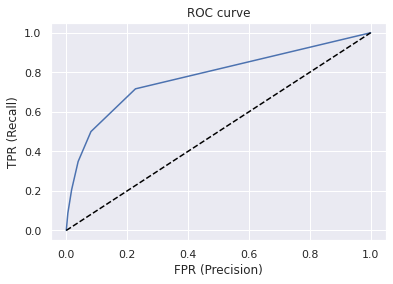

0.7778862086099982

In [95]:
roc_score_knc,knc_fpr,knc_tpr,knc_probability = Roc_curve(knc, X_train, X_test, y_train, y_test)
roc_score_knc

With hyper parameter tuning 

One of the challenges in a k-NN algorithm is finding the best 'k' i.e. the number of neighbors to be used in the majority vote while deciding the class. Generally, it is advisable to test the accuracy of your model for different values of k and then select the best one from them.
for details into Hyperparameter Tuning [click here](https://www.kaggle.com/code/arunimsamudra/k-nn-with-hyperparameter-tuning) 

In [96]:
from sklearn import metrics


In [97]:
mean_acc = np.zeros(20)
for i in range(1,21):
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train_sm,y_train_sm)
    yhat= knn.predict(X_test)
    mean_acc[i-1] = metrics.accuracy_score(y_test, yhat)

mean_acc

array([0.8684152 , 0.88686375, 0.88397422, 0.88864192, 0.88741943,
       0.88975328, 0.88797511, 0.89019782, 0.88853078, 0.89053123,
       0.88830851, 0.88864192, 0.88886419, 0.88975328, 0.88697488,
       0.88908646, 0.8860858 , 0.88875306, 0.88719715, 0.8891976 ])

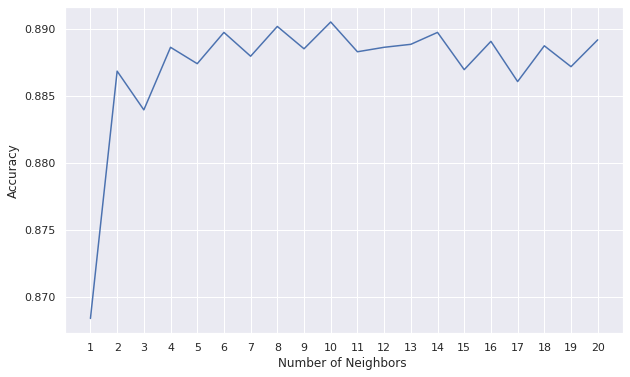

In [98]:
loc = np.arange(1,21,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

n_neighbors: Decide the best k based on the values we have computed earlier.
weights: Check whether adding weights to the data points is beneficial to the model or not. 'uniform' assigns no weight, while 'distance' weighs points by the inverse of their distances meaning nearer points will have more weight than the farther points.
metric: The distance metric to be used will calculating the similarity.

In [99]:
grid_params = { 'n_neighbors' : [2],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [100]:
knc = KNeighborsClassifier()

knc_grid = GridSearchCV(knc, grid_params, verbose = 1, cv=3, n_jobs = -1)
fit_mod(knc_grid, X_train_sm, X_test, y_train_sm, y_test)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Training accuracy Score    :  0.9588403609722354
Testing accuracy Score :  0.8889753278506335
              precision    recall  f1-score   support

           0       0.98      0.90      0.94      8635
           1       0.21      0.61      0.31       363

    accuracy                           0.89      8998
   macro avg       0.59      0.76      0.62      8998
weighted avg       0.95      0.89      0.91      8998



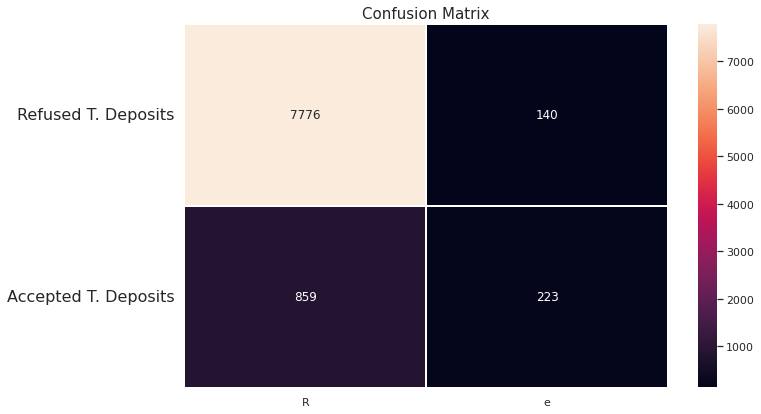

In [101]:
confu_mat(knc_grid, X_train, X_test, y_train, y_test)

## XGB Classifier

In [102]:
#takes huge amount of time to execute
import xgboost as xgb

xgbc = xgb.XGBClassifier()

fit_mod(xgbc, X_train_sm, X_test, y_train_sm, y_test)

Training accuracy Score    :  0.9424110932930856
Testing accuracy Score :  0.9048677483885308
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      7996
           1       0.57      0.61      0.59      1002

    accuracy                           0.90      8998
   macro avg       0.76      0.78      0.77      8998
weighted avg       0.91      0.90      0.91      8998



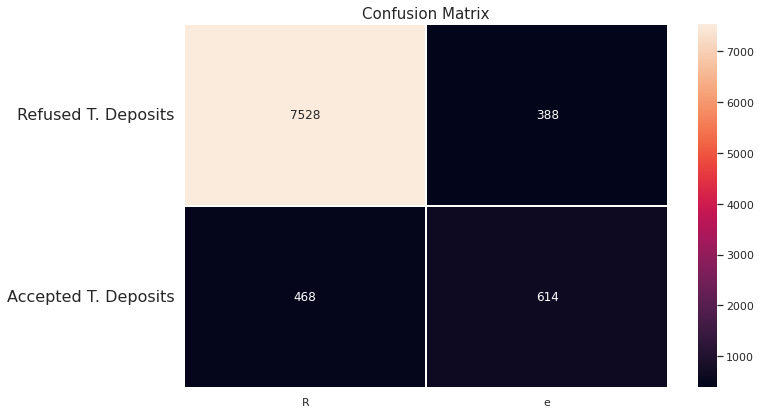

In [103]:
confu_mat(xgbc, X_train, X_test, y_train, y_test)

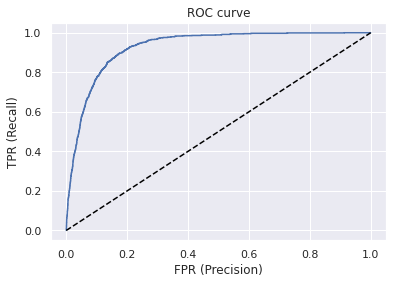

In [104]:
roc_score_xgb,xgb_fpr,xgb_tpr,Xgb_probability = Roc_curve(xgbc, X_train, X_test, y_train, y_test)

With  Hyperparameter Tuning
for more info [click](https://www.kaggle.com/code/prashant111/a-guide-on-xgboost-hyperparameters-tuning/notebook#3.-Basic-Setup-)

In [105]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [106]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [107]:
xgbc = xgb.XGBClassifier()

xgbc_grid=RandomizedSearchCV(xgbc,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

fit_mod(xgbc_grid, X_train_sm, X_test, y_train_sm, y_test)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Training accuracy Score    :  0.9999859229124985
Testing accuracy Score :  0.905979106468104
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      8236
           1       0.46      0.65      0.54       762

    accuracy                           0.91      8998
   macro avg       0.71      0.79      0.74      8998
weighted avg       0.92      0.91      0.91      8998



In [108]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
xgbc_grid.fit(X_train_sm,y_train_sm)
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits

 Time taken: 0 hours 2 minutes and 14.76 seconds.


Important Feature for XG Boost Classifier

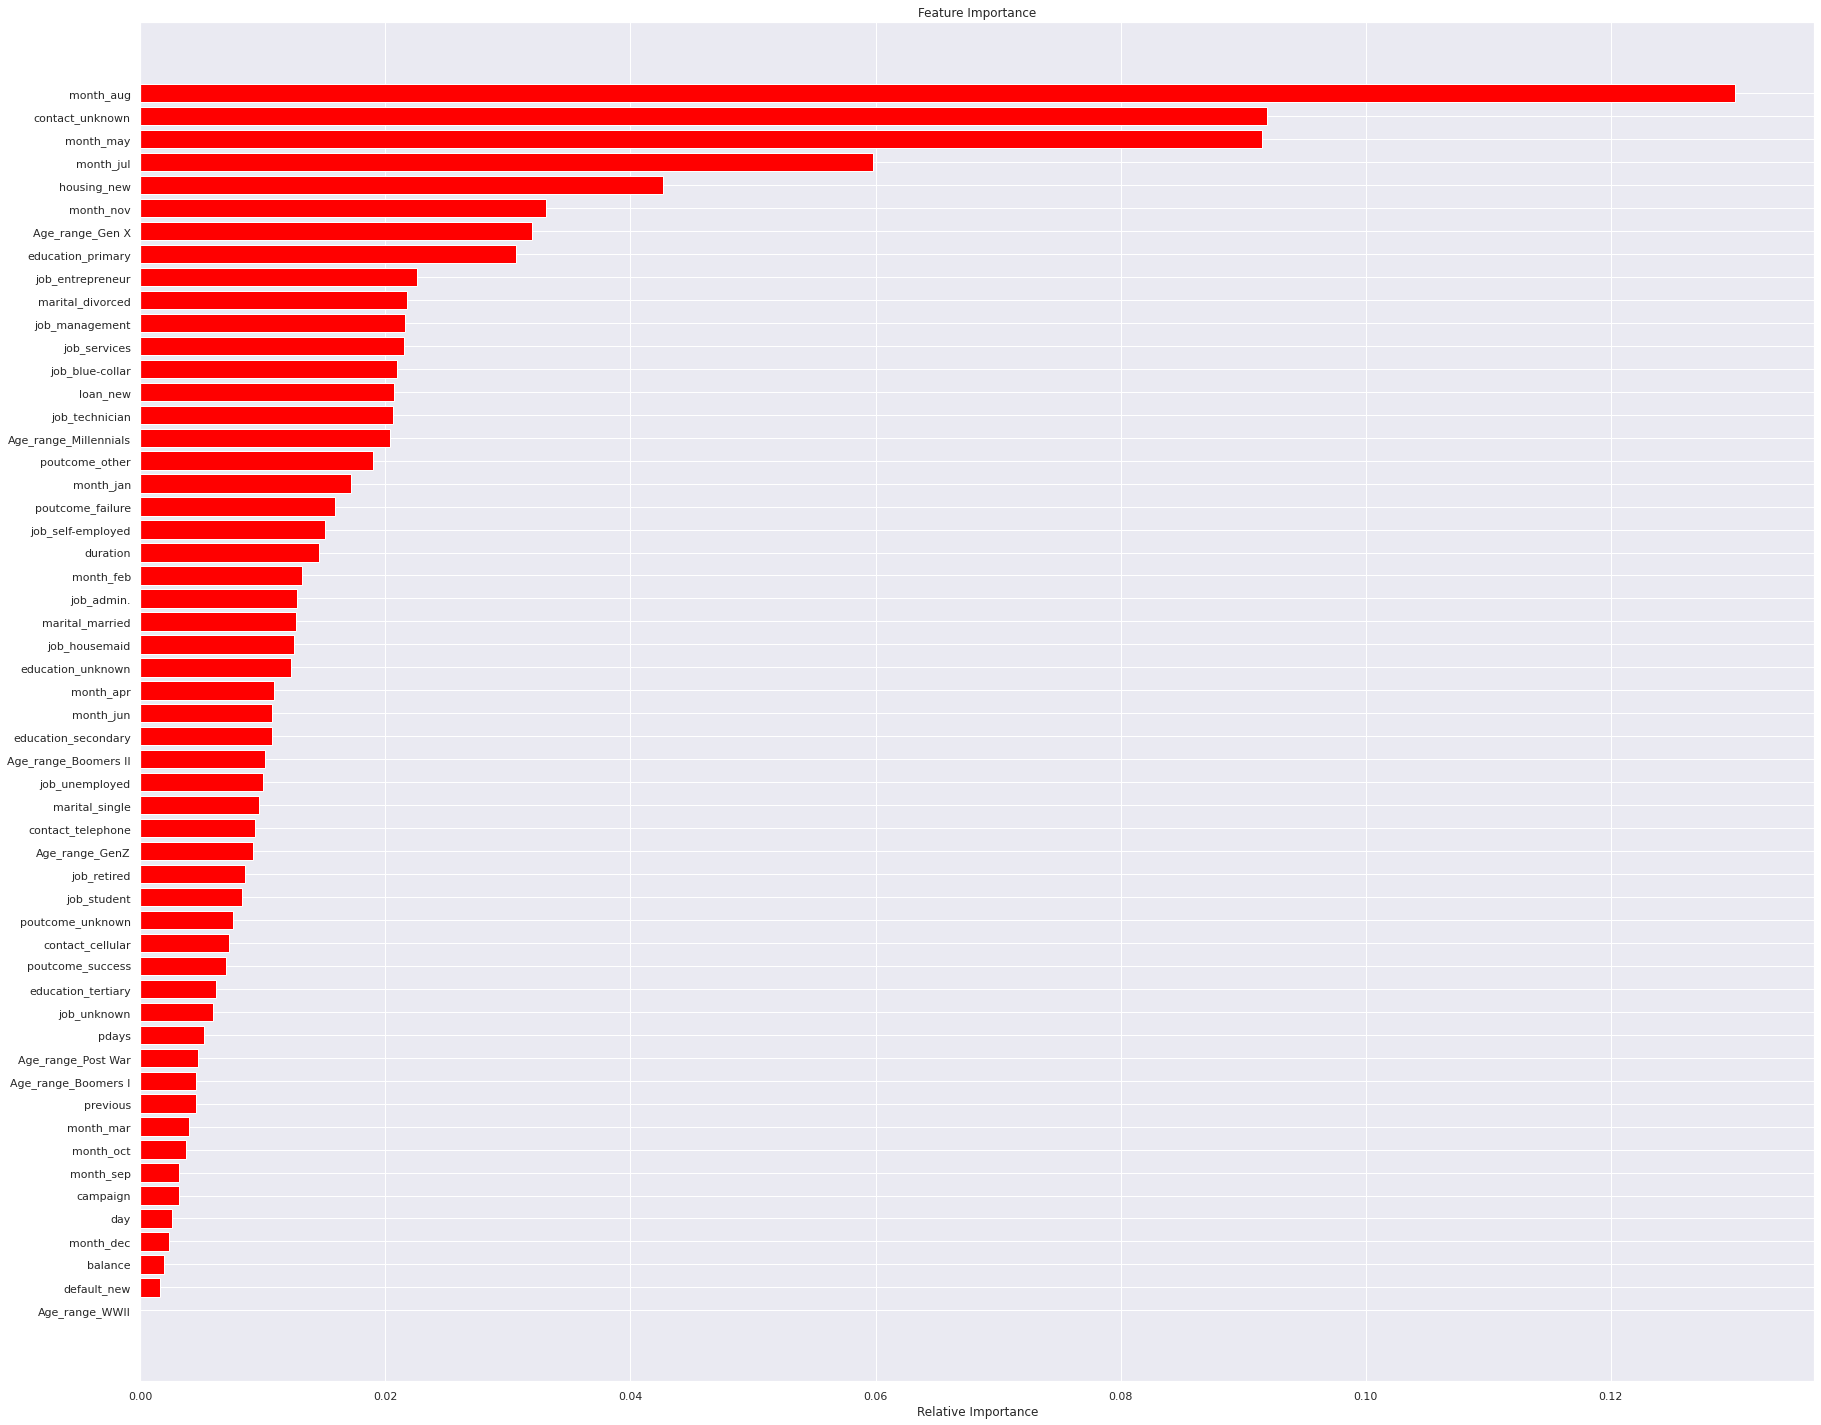

In [109]:
imp_fe(xgbc_grid)

## Naive Byes Classifier

In [110]:
from sklearn.naive_bayes import MultinomialNB

nbc = MultinomialNB()

fit_mod(nbc, X_train_sm, X_test, y_train_sm, y_test)

Training accuracy Score    :  0.8596987705562368
Testing accuracy Score :  0.8237386085796844
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      7370
           1       0.52      0.35      0.41      1628

    accuracy                           0.82      8998
   macro avg       0.69      0.64      0.66      8998
weighted avg       0.80      0.82      0.81      8998



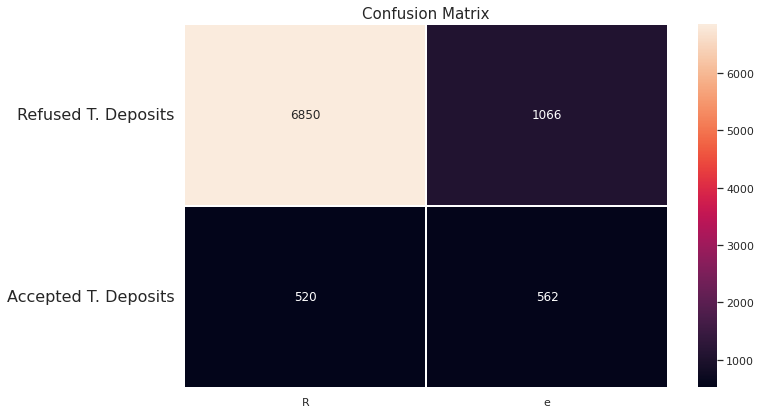

In [111]:
confu_mat(nbc, X_train_sm, X_test, y_train_sm, y_test)

ROC AOC Curve for Naive Byes Classifier



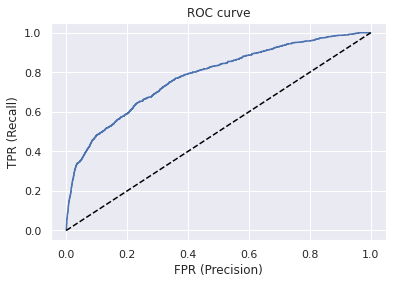

In [112]:
roc_score_nbc , nbc_fpr , nbc_tpr , nbc_probability = Roc_curve(nbc, X_train, X_test, y_train, y_test)

# Comparision of different classifiers 

In [113]:
#roc_auc_score for different classifiers
from sklearn.metrics import roc_auc_score
print('logistic regression Classifier Score: ',  roc_auc_score(y_test, lr_probability))
print('Decision tree Classifier Score: ',        roc_auc_score(y_test, dt_probability))
print('Random Forest Classifier: ',              roc_auc_score(y_test, rfc_probability))
print('Gradient Boosting Classifier Score: ',    roc_auc_score(y_test, gb_probability))
print('knn Classifier Score: ',                  roc_auc_score(y_test, knc_probability))
print('XGB Classifier: ',                        roc_auc_score(y_test, Xgb_probability))
print('naive bayes classifer: ',                 roc_auc_score(y_test, nbc_probability))

logistic regression Classifier Score:  0.9138691940047019
Decision tree Classifier Score:  0.8982138820835033
Random Forest Classifier:  0.9308393165203209
Gradient Boosting Classifier Score:  0.9135791802839239
knn Classifier Score:  0.7778862086099982
XGB Classifier:  0.9275820911623807
naive bayes classifer:  0.7782474998575617


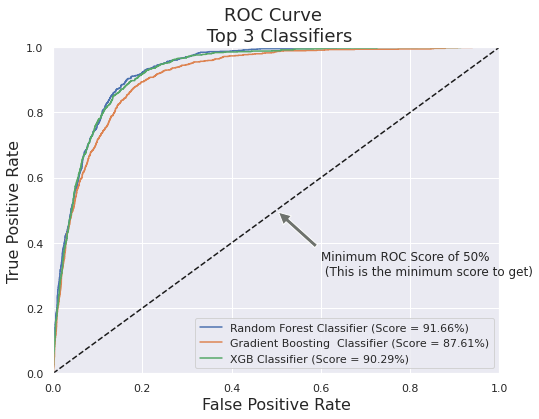

In [114]:
#roc curves
def graph_roc_curve_multiple(rfc_fpr, rfc_tpr, gb_fpr, gb_tpr, xgb_fpr, xgb_tpr):
    plt.figure(figsize=(8,6))
    plt.title('ROC Curve \n Top 3 Classifiers', fontsize=18)
    plt.plot(rfc_fpr, rfc_tpr, label='Random Forest Classifier (Score = 91.66%)')
    plt.plot(gb_fpr, gb_tpr, label='Gradient Boosting  Classifier (Score = 87.61%)')
    plt.plot(xgb_fpr, xgb_tpr, label='XGB Classifier (Score = 90.29%)')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(rfc_fpr, rfc_tpr, gb_fpr, gb_tpr, xgb_fpr, xgb_tpr)
plt.show()

#<b>Model Building without including "Duration" feature 

Here, we will use random forest and gradient decent as they provided the best results.

In [60]:
X = df_m.drop(['y','duration'],axis=1)
y = df_m['y']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=34)
print(X_train.shape)
print(X_test.shape)

(35992, 53)
(8998, 53)


In [61]:
sm = SMOTE(random_state = 0)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)